# Spatial plots comparing modelled ET with high-res satellite based obs datasets

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import sys
import glob
import xesmf as xe
from pyproj import Proj
import cartopy.crs as ccrs
from pyproj import Proj
import cartopy.feature as cfeature
import geopandas as gpd
import xesmf as xe
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

new_path = '/home/566/ad9701/wrf_hydro/'
if new_path not in sys.path:
    sys.path.append(new_path)
import wrf_hydro_analyses_funcs as myhydro

new_path = '/home/566/ad9701/drought_probability/final_code_AU/'
if new_path not in sys.path:
    sys.path.append(new_path)
import validation_functions as myfuncs

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### MODIS

In [4]:
! ls -l /g/data/w97/ad9701/WRF-Hydro/SEA/MODIS_ET_LE_geog/SEA_Aqua_NetET_LE_GapFilled/seasonal_data/

total 418412
-rw-r--r-- 1 ad9701 w97 47609703 Oct  5 13:07 2016-17_ET_500m_mean.nc
-rw-r--r-- 1 ad9701 w97 95198829 Aug 23 09:33 2016-17_LE_500m_mean.nc
-rw-r--r-- 1 ad9701 w97 47609703 Oct  5 13:01 2016_ET_500m_mean.nc
-rw-r--r-- 1 ad9701 w97 95198829 Aug 23 09:31 2016_LE_500m_mean.nc
-rw-r--r-- 1 ad9701 w97 47609703 Oct  5 13:02 2017_ET_500m_mean.nc
-rw-r--r-- 1 ad9701 w97 95198829 Aug 23 09:31 2017_LE_500m_mean.nc


### CMRSET

In [5]:
! ls -l /g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data/

total 20385568
-rw-r--r-- 1 ad9701 w97 6958265004 Nov 22 16:20 2016-17_ETa_mean.nc
-rw-r--r-- 1 ad9701 w97 6958265004 Nov 22 16:11 2016_ETa_mean.nc
-rw-r--r-- 1 ad9701 w97 6958265004 Nov 22 16:15 2017_ETa_mean.nc


### Model obs compare spatial plot

In [6]:
! ls /g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_1km/wrf_hydro_nwm_public-5.2.0_domain4_1km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/

2016-17_ET_mean_forRegrid_bckup.nc	 2016_SOIL_M_2layer_mean.nc
2016-17_ET_mean_forRegrid.nc		 2016_SOIL_M_2layer_seasonal_accum.nc
2016-17_ET_mean.nc			 2016_SOIL_M_mean.nc
2016-17_HFX_mean.nc			 2016_SOIL_M_seasonal_accum.nc
2016-17_LH_mean.nc			 2017_ET_mean.nc
2016-17_SOIL_M_2layer_mean.nc		 2017_HFX_mean.nc
2016-17_SOIL_M_2layer_seasonal_accum.nc  2017_LH_mean.nc
2016-17_SOIL_M_mean.nc			 2017_SOIL_M_2layer_mean.nc
2016-17_SOIL_M_seasonal_accum.nc	 2017_SOIL_M_2layer_seasonal_accum.nc
2016_ET_mean.nc				 2017_SOIL_M_mean.nc
2016_HFX_mean.nc			 2017_SOIL_M_seasonal_accum.nc
2016_LH_mean.nc


In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

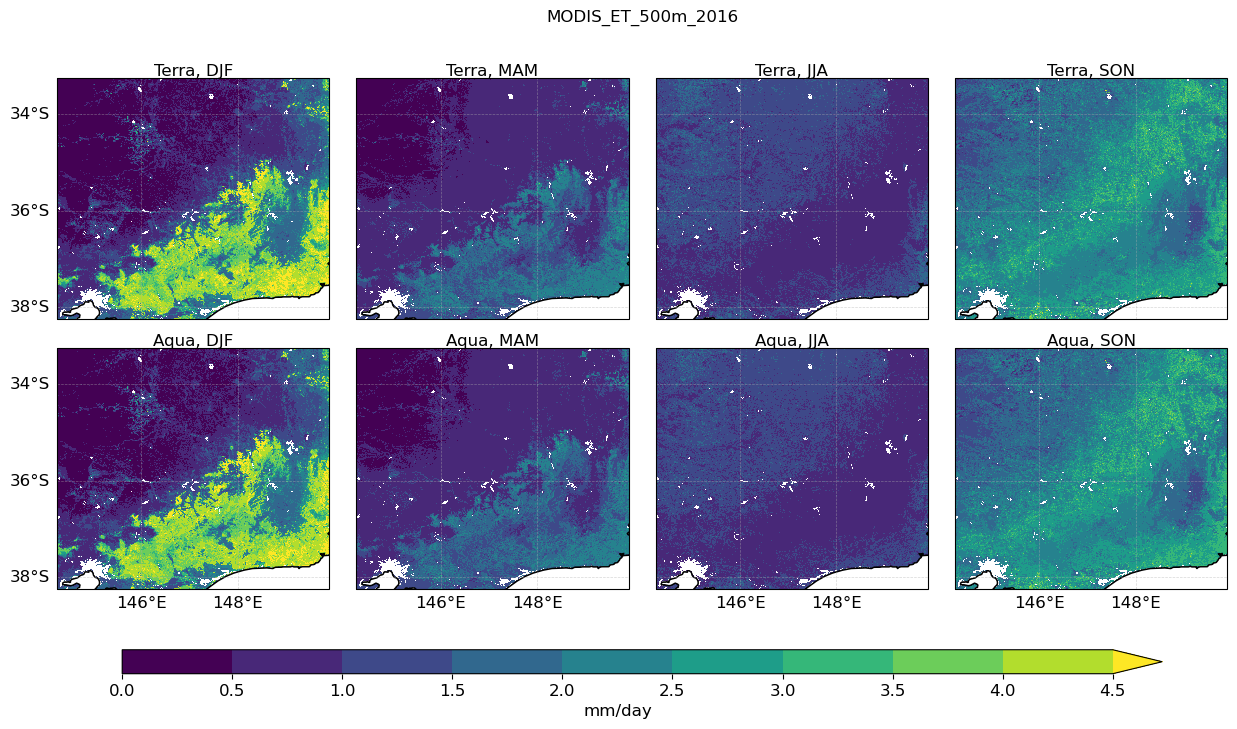

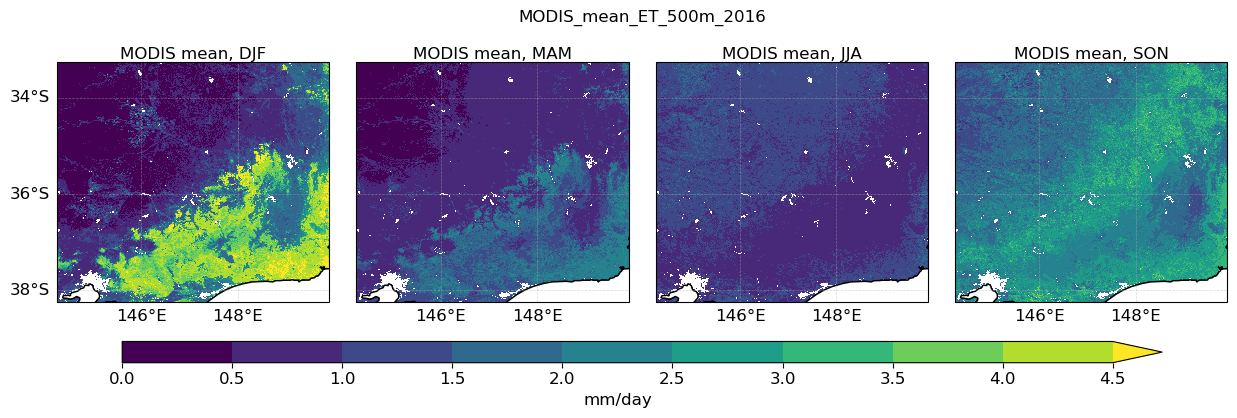

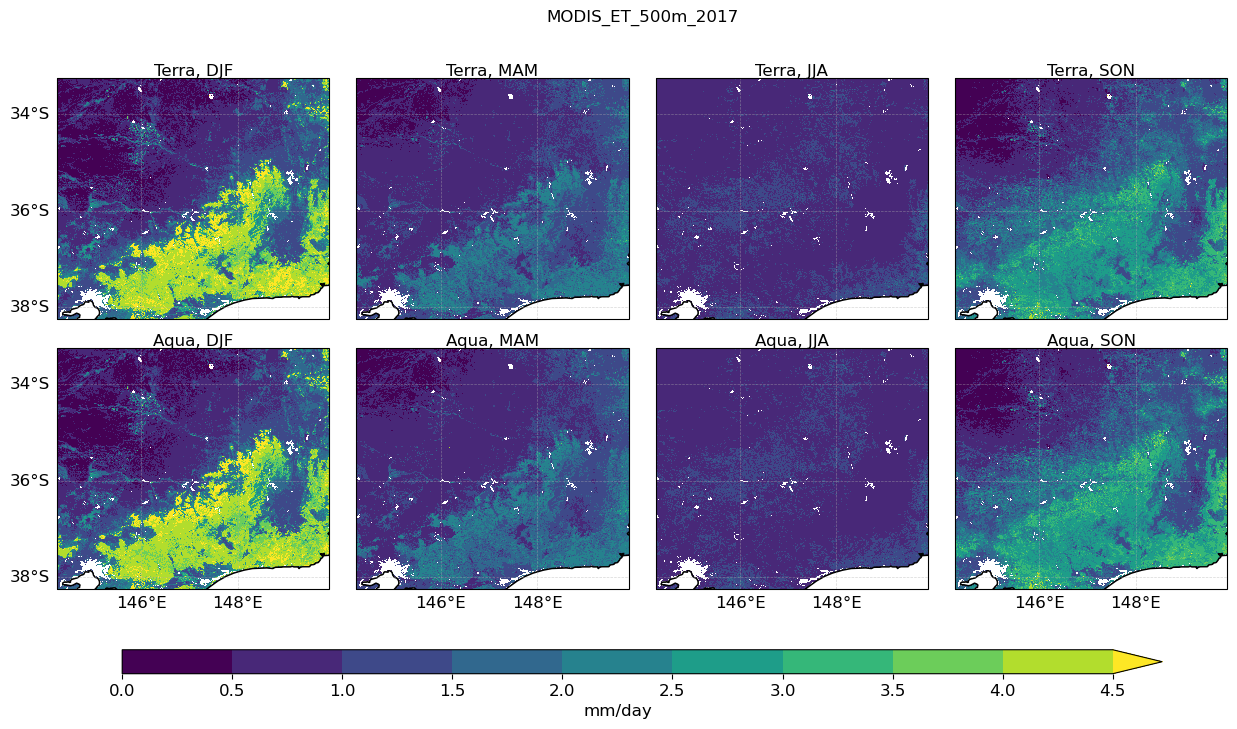

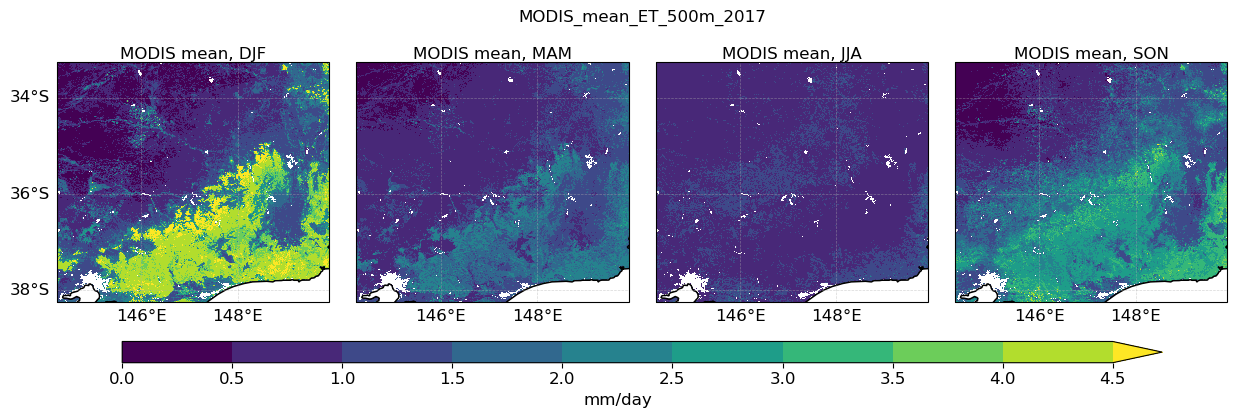

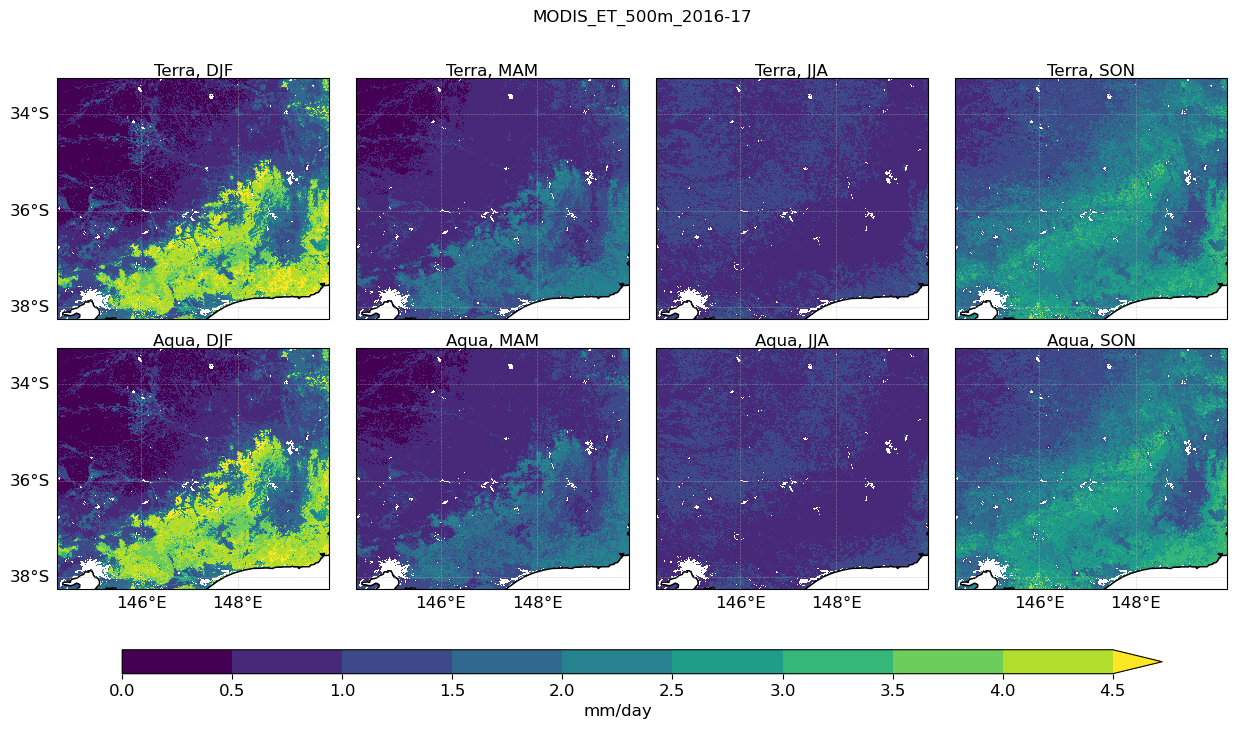

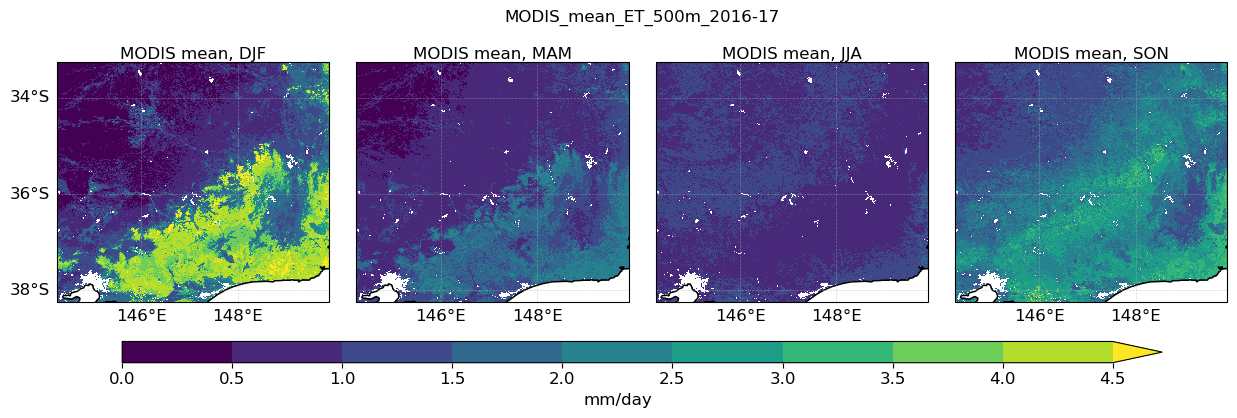

In [10]:
# plot observed seasonal mean 2016, 2017 & 2016-17

out_dir = '/home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_allRes_noBaseFlow/calib_eval/compare_MODIS_CMRSET_ET/'

terra_dir = '/g/data/w97/ad9701/WRF-Hydro/SEA/MODIS_ET_LE_geog/SEA_Terra_NetET_LE_GapFilled/seasonal_data/'
aqua_dir = '/g/data/w97/ad9701/WRF-Hydro/SEA/MODIS_ET_LE_geog/SEA_Aqua_NetET_LE_GapFilled/seasonal_data/'

########################
# SELECT SHAPEFILES
########################

sh1 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rbasin_polygon_SEA_subset.shp'
sh2 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rivers_so4_and_higher.shp'
sh3 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/SEA_domain4_4km_WGS.shp'

# to plot SW basin boundaries & rivers
# shapefile = [sh1, sh2]
# shapefile_color=['darkgrey', 'deeppink']
# sh_lwd = [1, 2]
# sh_alpha = 0.3

# to plot  rivers
shapefile = [sh2, sh3]
shapefile_color=['deeppink', 'black']
sh_lwd = [1, 2]
sh_alpha = 0.3

########################
# PLOT
########################

%run -i /home/566/ad9701/wrf_hydro/spatial_plots_units_cbar_limits.py
# same color levels used for the model plots
mean_clevels = col_levels_mean['ET']
units = units['ET']

seas_names = ['DJF', 'MAM', 'JJA', 'SON']
varname = 'ET_500m'

# lat-lon limits around the SEA domain
lat_sel = slice(-33.25, -38.25)
lon_sel = slice(144.25, 149.9)
xticks = [144, 146, 148]
yticks = [-34, -36, -38]
panel_width = 3.25

time_key_list = ['2016', '2017', '2016-17']

for time_key in time_key_list:

    ds_terra = xr.open_dataset(terra_dir + time_key + '_' + varname + '_mean.nc')
    da_terra = ds_terra[varname]
    ds_aqua = xr.open_dataset(aqua_dir + time_key + '_' + varname + '_mean.nc')
    da_aqua = ds_aqua[varname]

    plot_list = [da_terra.sel(lat = lat_sel, lon = lon_sel, season = s) for s in seas_names]
    plot_list.extend([da_aqua.sel(lat = lat_sel, lon = lon_sel, season = s) for s in seas_names])
   
    subplot_title = [x + ', ' + y for x in ['Terra', 'Aqua'] for y in seas_names]

    cmap = 'viridis'
    cbar_extend = 'max'
        
    panel_height = 4
    fig1 = myfuncs.draw_pcolormesh_Npanels(plot_list, ncols=4, nrows=2, #projection=projection, 
                                           subplot_title=subplot_title, main_title='MODIS_' + varname + '_' + time_key, 
                                           xticks=xticks, yticks=yticks, #level=[]
                                           levels=mean_clevels, 
                                           cmap=cmap, cbar_extend=cbar_extend, cbar_label=units,longer_cbar=True,
                                           panel_height=panel_height, panel_width=panel_width,
                                           out_dir=out_dir, out_figname='MODIS_' + varname + '_' + time_key , fig_dpi=600) #+ 'wRivers_600dpi' , fig_dpi=600, 
                                           #shapefile = shapefile, shapefile_color=shapefile_color, sh_alpha = sh_alpha, sh_lwd = sh_lwd)
    # fig1.clear()
    # plt.close()

    da_mean = (da_terra.sel(lat = lat_sel, lon = lon_sel) + da_aqua.sel(lat = lat_sel, lon = lon_sel))/2
    plot_list = [da_mean.sel(lat = lat_sel, lon = lon_sel, season = s) for s in seas_names]
    subplot_title = [x + ', ' + y for x in ['MODIS mean'] for y in seas_names]

    panel_height = 4.25
    fig2 = myfuncs.draw_pcolormesh_Npanels(plot_list, ncols=4, nrows=1, #projection=projection, 
                                           subplot_title=subplot_title, main_title='MODIS_mean_' + varname + '_' + time_key, 
                                           xticks=xticks, yticks=yticks, #level=[]
                                           levels=mean_clevels, 
                                           cmap=cmap, cbar_extend=cbar_extend, cbar_label=units,thicker_cbar=True,
                                           panel_height=panel_height, panel_width=panel_width,
                                           out_dir=out_dir, out_figname='MODIS_mean_' + varname + '_' + time_key , fig_dpi=600) #+ 'wRivers_600dpi' , fig_dpi=600, 
                                           #shapefile = shapefile, shapefile_color=shapefile_color, sh_alpha = sh_alpha, sh_lwd = sh_lwd)
    

### CMRSET data

### Looks like data has to be divided by 1000 so that it is within expected ranges
(confirmed this by e-mail; data authors mentioned that this will be updated in a future version)  

In [3]:
f1 = '/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/CMRSET_LANDSAT_v2_2_2016_01_01_ETa_SEA_dom4_clip.nc'
ds1 = xr.open_dataset(f1)
ds1

<xarray.Dataset>
Dimensions:      (y: 19439, x: 22371)
Coordinates:
  * x            (x) float64 144.1 144.1 144.1 144.1 ... 150.1 150.1 150.1 150.1
  * y            (y) float64 -33.24 -33.24 -33.24 ... -38.48 -38.48 -38.48
    spatial_ref  int64 ...
Data variables:
    ETa          (y, x) float32 ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

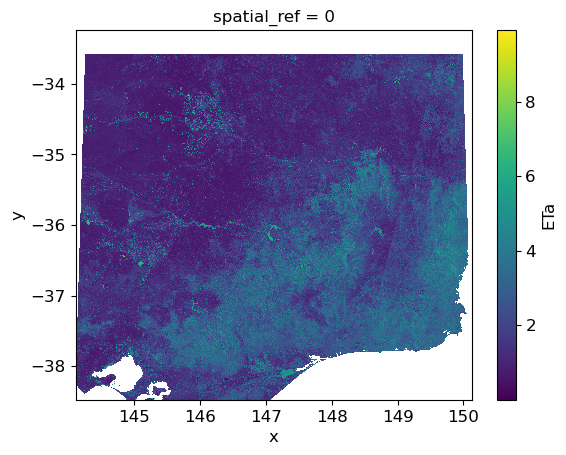

In [6]:
(ds1['ETa']/1000).plot()

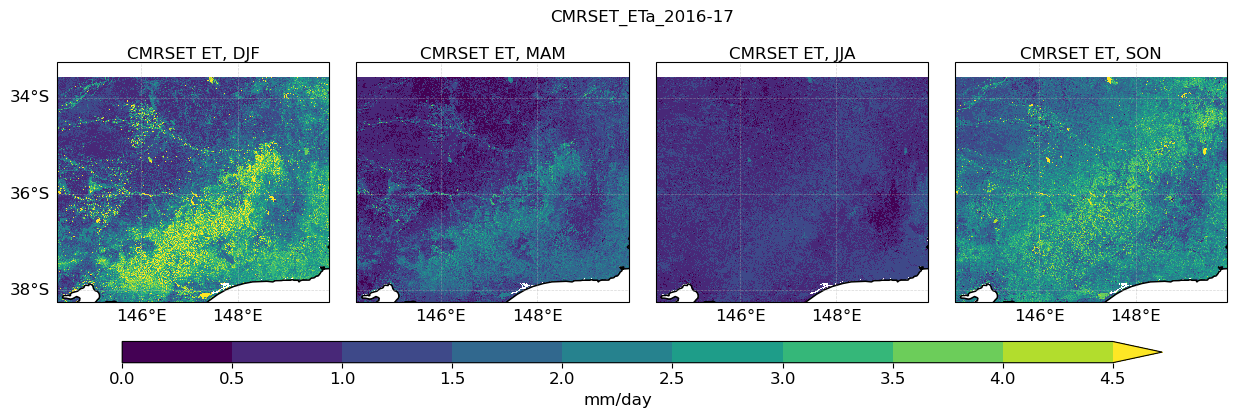

In [3]:
# plot observed seasonal mean 2016, 2017 & 2016-17

out_dir = '/home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_allRes_noBaseFlow/calib_eval/compare_MODIS_CMRSET_ET/'

cmrset_dir = '/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data/'

########################
# SELECT SHAPEFILES
########################

sh1 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rbasin_polygon_SEA_subset.shp'
sh2 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rivers_so4_and_higher.shp'
sh3 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/SEA_domain4_4km_WGS.shp'

# to plot SW basin boundaries & rivers
# shapefile = [sh1, sh2]
# shapefile_color=['darkgrey', 'deeppink']
# sh_lwd = [1, 2]
# sh_alpha = 0.3

# to plot  rivers
shapefile = [sh2, sh3]
shapefile_color=['deeppink', 'black']
sh_lwd = [1, 2]
sh_alpha = 0.3

########################
# PLOT
########################

%run -i /home/566/ad9701/wrf_hydro/spatial_plots_units_cbar_limits.py
# same color levels used for the model plots
mean_clevels = col_levels_mean['ET']
units = units['ET']

seas_names = ['DJF', 'MAM', 'JJA', 'SON']
varname = 'ETa'

# lat-lon limits around the SEA domain
lat_sel = slice(-33.25, -38.25)
lon_sel = slice(144.25, 149.9)
xticks = [144, 146, 148]
yticks = [-34, -36, -38]
panel_width = 3.25

# time_key_list = ['2016', '2017', '2016-17']

time_key_list = ['2016-17']

for time_key in time_key_list:

    ds_et = xr.open_dataset(cmrset_dir + time_key + '_' + varname + '_mean.nc')
    da_et = ds_et[varname]
    da_et.load()

    # Data looks like it needs to be divided by a 1000, will confirm with the developer
    plot_list = [da_et.sel(lat = lat_sel, lon = lon_sel, season = s)/1000 for s in seas_names]
    
    subplot_title = ['CMRSET ET, ' + y for y in seas_names]

    cmap = 'viridis'
    cbar_extend = 'max'
        

    panel_height = 4.25
    fig2 = myfuncs.draw_pcolormesh_Npanels(plot_list, ncols=4, nrows=1, #projection=projection, 
                                           subplot_title=subplot_title, main_title='CMRSET_' + varname + '_' + time_key, 
                                           xticks=xticks, yticks=yticks, #level=[]
                                           levels=mean_clevels, 
                                           cmap=cmap, cbar_extend=cbar_extend, cbar_label=units,thicker_cbar=True,
                                           panel_height=panel_height, panel_width=panel_width,
                                           out_dir=out_dir, out_figname='CMRSET_' + varname + '_' + time_key , fig_dpi=600) #+ 'wRivers_600dpi' , fig_dpi=600, 
                                           #shapefile = shapefile, shapefile_color=shapefile_color, sh_alpha = sh_alpha, sh_lwd = sh_lwd)
    del da_et
    

## Spatial pattern of differences between model and obs

In [17]:
! ls /g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_1km/wrf_hydro_nwm_public-5.2.0_domain4_1km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES
#/seasonal_data/

20130101.LDASOUT_DOMAIN1  20150803.LDASOUT_DOMAIN1
20130102.LDASOUT_DOMAIN1  20150804.LDASOUT_DOMAIN1
20130103.LDASOUT_DOMAIN1  20150805.LDASOUT_DOMAIN1
20130104.LDASOUT_DOMAIN1  20150806.LDASOUT_DOMAIN1
20130105.LDASOUT_DOMAIN1  20150807.LDASOUT_DOMAIN1
20130106.LDASOUT_DOMAIN1  20150808.LDASOUT_DOMAIN1
20130107.LDASOUT_DOMAIN1  20150809.LDASOUT_DOMAIN1
20130108.LDASOUT_DOMAIN1  20150810.LDASOUT_DOMAIN1
20130109.LDASOUT_DOMAIN1  20150811.LDASOUT_DOMAIN1
20130110.LDASOUT_DOMAIN1  20150812.LDASOUT_DOMAIN1
20130111.LDASOUT_DOMAIN1  20150813.LDASOUT_DOMAIN1
20130112.LDASOUT_DOMAIN1  20150814.LDASOUT_DOMAIN1
20130113.LDASOUT_DOMAIN1  20150815.LDASOUT_DOMAIN1
20130114.LDASOUT_DOMAIN1  20150816.LDASOUT_DOMAIN1
20130115.LDASOUT_DOMAIN1  20150817.LDASOUT_DOMAIN1
20130116.LDASOUT_DOMAIN1  20150818.LDASOUT_DOMAIN1
20130117.LDASOUT_DOMAIN1  20150819.LDASOUT_DOMAIN1
20130118.LDASOUT_DOMAIN1  20150820.LDASOUT_DOMAIN1
20130119.LDASOUT_DOMAIN1  20150821.LDASOUT_DOMAIN1
20130120.LDASOUT_DOMAIN1  20150

In [8]:
wrf_hydro_ctl_list = ['/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_1km/wrf_hydro_nwm_public-5.2.0_domain4_1km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_10km/wrf_hydro_nwm_public-5.2.0_domain4_10km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/']
ctl_name_list = ['defSoil_defPar_1km', 'defSoil_defPar_4km', 'defSoil_defPar_10km']

wrf_hydro_lat_list = ['/g/data/w28/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_1km_100mRT/output_wrf_hydro_nwm_public-5.2.0_domain4_1km_monPnTCorr_t500_RTCHon_monPnTCorr_defSoil_defPar/OUTPUT/DAILY_FILES/seasonal_data/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km_100mRT/wrf_hydro_nwm_public-5.2.0_domain4_4km_t500_RTCHon_4g_monPnTCorr_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_10km_100mRT/wrf_hydro_nwm_public-5.2.0_trial2/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/']
run_name_list = ['defSoil_defPar_1km_100RT', 'defSoil_defPar_4km_100RT', 'defSoil_defPar_10km_100RT']

wrf_hydro_lat_list_250 = ['/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_1km/wrf_hydro_nwm_public-5.2.0_domain4_1km_monPnTCorr_t80_RTCHon_monPnTCorr_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_t80_RTCHon_12g_monPnTCorr_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_10km/wrf_hydro_nwm_public-5.2.0_domain4_10km_monPnTCorr_t80_RTCHon_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/']
run_name_list_250 = ['defSoil_defPar_1km_250RT', 'defSoil_defPar_4km_250RT', 'defSoil_defPar_10km_250RT']

### CMRSET data is too large to be regridded using Jupyter notebooks. Using ESMF_regrid in parallel jobs instead (/home/566/ad9701/WRF_Hydro_scripts/regrid_CMRSET/)
### This requires data & attributes to have specific formats/dimensions. Saving required data below (both cmrset & model output)

In [12]:
# calculate differences in seasonal mean during 2016-17

time_key = '2016-17'
mdlVar = 'ET'
mdlVar2 = 'LH'  # using to get the 'esri_pe_string' which is not there in the processed ET data

# mean seasonal CMRSET obs
for time_key in ['2016-17', '2016', '2017']:
    obsVar = 'ETa'
    cmrset_dir = '/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data/'
    ds_cmrset = xr.open_dataset(cmrset_dir + time_key + '_' + obsVar + '_mean.nc')
    da_obs_cmrset = ds_cmrset[obsVar].load()
    
    ###### ******* Data for ESMF_regrid; already written
    da_obs_cmrset['lat'] = da_obs_cmrset['lat'].assign_attrs({'units': "degrees_north"})
    da_obs_cmrset['lon'] = da_obs_cmrset['lon'].assign_attrs({'units': "degrees_east"})
    et_attrs = da_obs_cmrset.attrs
    et_attrs.update({'coordinates': "lat lon"})
    del da_obs_cmrset.encoding['coordinates'] 
    da_obs_cmrset.assign_attrs(et_attrs)
    
    cmrset_outfile = cmrset_dir + time_key + '_' + obsVar + '_mean_forRegrid.nc'
    da_obs_cmrset.to_netcdf(cmrset_outfile)
#*****

# def add_latlon_coords_3d(da):
#     '''
#     Assuming that the first dimension is a time dimension
#     '''
#     X, Y = np.meshgrid(da.x.values, da.y.values)
#     source = Proj(da.attrs['esri_pe_string'])
#     lon, lat = source(X.flatten(), Y.flatten(), inverse=True)
#     lon_2d = lon.reshape(X.shape)
#     lat_2d = lat.reshape(Y.shape)

#     da.coords['lat'] = (da.dims[1::], lat_2d)
#     da.coords['lon'] = (da.dims[1::], lon_2d)
#     return(da)

# for dir_list in [wrf_hydro_ctl_list, wrf_hydro_lat_list, wrf_hydro_lat_list_250]:
    
#     for mdl_dir in dir_list:
#         print(mdl_dir)
#         ds_mdl = xr.open_dataset(mdl_dir + time_key + '_' + mdlVar + '_mean.nc')
#         ds_mdl2 = xr.open_dataset(mdl_dir + time_key + '_' + mdlVar2 + '_mean.nc')
#         ds_mdl[mdlVar].attrs.update({'esri_pe_string': ds_mdl2[mdlVar2].attrs['esri_pe_string']})
#         da_mdl_temp = ds_mdl[mdlVar]
#         da_mdl_temp = add_latlon_coords_3d(da_mdl_temp)

#         #**** writing model data for ESMF regrid
#         da_mdl_temp['lat'] = da_mdl_temp['lat'].assign_attrs({'units': "degrees_north"})
#         da_mdl_temp['lon'] = da_mdl_temp['lon'].assign_attrs({'units': "degrees_east"})
#         et_attrs = da_mdl_temp.attrs
#         et_attrs.update({'coordinates': "lon lat"})
#         da_mdl_temp.assign_attrs(et_attrs)
#         mdl_outfile = mdl_dir + time_key + '_' + mdlVar + '_mean_forRegrid.nc'
#         da_mdl_temp.to_netcdf(mdl_outfile)
#         #*****

### Calculate diff

In [22]:
# calculate differences in seasonal mean during 2016-17

time_key = '2017'
mdlVar = 'ET'
mdlVar2 = 'LH'  # using to get the 'esri_pe_string' which is not there in the processed ET data

# mean seasonal MODIS obs
obsVar = 'ET_500m'
terra_dir = '/g/data/w97/ad9701/WRF-Hydro/SEA/MODIS_ET_LE_geog/SEA_Terra_NetET_LE_GapFilled/seasonal_data/'
aqua_dir = '/g/data/w97/ad9701/WRF-Hydro/SEA/MODIS_ET_LE_geog/SEA_Aqua_NetET_LE_GapFilled/seasonal_data/'
ds_terra = xr.open_dataset(terra_dir + time_key + '_' + obsVar + '_mean.nc')
ds_aqua = xr.open_dataset(aqua_dir + time_key + '_' + obsVar + '_mean.nc')
da_obs_modis = (ds_terra[obsVar] + ds_aqua[obsVar])/2

# mean seasonal CMRSET obs
# obsVar = 'ETa'
# cmrset_dir = '/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data/'
# ds_cmrset = xr.open_dataset(cmrset_dir + time_key + '_' + obsVar + '_mean.nc')
# da_obs_cmrset = ds_cmrset[obsVar].load()

#### **** CMRSET data has been regridded to the model grid as the Regridder does not work in the jupyter notebook as the data is too big
cmrsetVar = 'ETa'
cmrset_dir = '/g/data/w97/ad9701/regrid_CMRSET/'
cmrset_reg_file_list = [time_key + suff for suff in ['_CMRSET_ETa_mean_1km.nc', '_CMRSET_ETa_mean_4km.nc', '_CMRSET_ETa_mean_10km.nc']]

list_all_da_mdl_sets = []

list_all_da_modis_reg_sets = []
list_all_da_mdl_minus_modis_sets = []

list_all_da_cmrset_reg_sets = []
list_all_da_mdl_minus_cmrset_sets = []

for dir_list in [wrf_hydro_ctl_list, wrf_hydro_lat_list, wrf_hydro_lat_list_250]:
    list_da_mdl = []
    
    list_da_modis_reg = []
    list_da_mdl_minus_modis = []

    list_da_cmrset_reg = []
    list_da_mdl_minus_cmrset = []
    
    # regrid obs to model grid & calculate differences with each sim
    for mdl_dir, cmrset_f in zip(dir_list, cmrset_reg_file_list):
        print(mdl_dir)
        ds_mdl = xr.open_dataset(mdl_dir + time_key + '_' + mdlVar + '_mean.nc')
        ds_mdl2 = xr.open_dataset(mdl_dir + time_key + '_' + mdlVar2 + '_mean.nc')
        ds_mdl[mdlVar].attrs.update({'esri_pe_string': ds_mdl2[mdlVar2].attrs['esri_pe_string']})
        da_mdl = ds_mdl[mdlVar]
        # da_mdl = myhydro.add_latlon_coords(ds_mdl[mdlVar])
        list_da_mdl.append(ds_mdl[mdlVar])
        da_mdl_temp = ds_mdl[mdlVar][0,:,:].drop('season')
        da_mdl_temp = myhydro.add_latlon_coords(da_mdl_temp)

        #*************
        # difference with modis data
        print('processing MODIS data')
        regridder = xe.Regridder(da_obs_modis, da_mdl_temp, 'bilinear', unmapped_to_nan=True)
        da_modis_reg = regridder(da_obs_modis)
        list_da_modis_reg.append(da_modis_reg)
        da_mdl_minus_modis = da_mdl - da_modis_reg
        list_da_mdl_minus_modis.append(da_mdl_minus_modis)
        #**************

        #*************
        # difference with cmrset data
        print('processing CMRSET data')
        # read in the regridded data
        ds_cmrset_reg = xr.open_dataset(cmrset_dir + cmrset_f)
        da_cmrset_reg = ds_cmrset_reg[cmrsetVar].rename({'extradim1':'season'}).assign_coords({'season': ds_cmrset_reg.season.values})
        list_da_cmrset_reg.append(da_cmrset_reg/1000)
        da_mdl_minus_cmrset = da_mdl - da_cmrset_reg/1000
        list_da_mdl_minus_cmrset.append(da_mdl_minus_cmrset)
        #**************    
    
    list_all_da_mdl_sets.append(list_da_mdl)
    list_all_da_modis_reg_sets.append(list_da_modis_reg)
    list_all_da_mdl_minus_modis_sets.append(list_da_mdl_minus_modis)

    list_all_da_cmrset_reg_sets.append(list_da_cmrset_reg)
    list_all_da_mdl_minus_cmrset_sets.append(list_da_mdl_minus_cmrset)

/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_1km/wrf_hydro_nwm_public-5.2.0_domain4_1km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/
processing MODIS data
processing CMRSET data
/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/
processing MODIS data
processing CMRSET data
/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_10km/wrf_hydro_nwm_public-5.2.0_domain4_10km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/seasonal_data/
processing MODIS data
processing CMRSET data
/g/data/w28/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_1km_100mRT/output_wrf_hydro_nwm_public-5.2.0_domain4_1km_monPnTCorr_t500_RTCHon_monPnTCorr_defSoil_defPar/OUTPUT/DAILY_FILES/seasonal_data/
processing MODIS data
processing CMRSET data
/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4k

## 1. CMRSET Plots

#### 1(a). model - obs at different resolutions

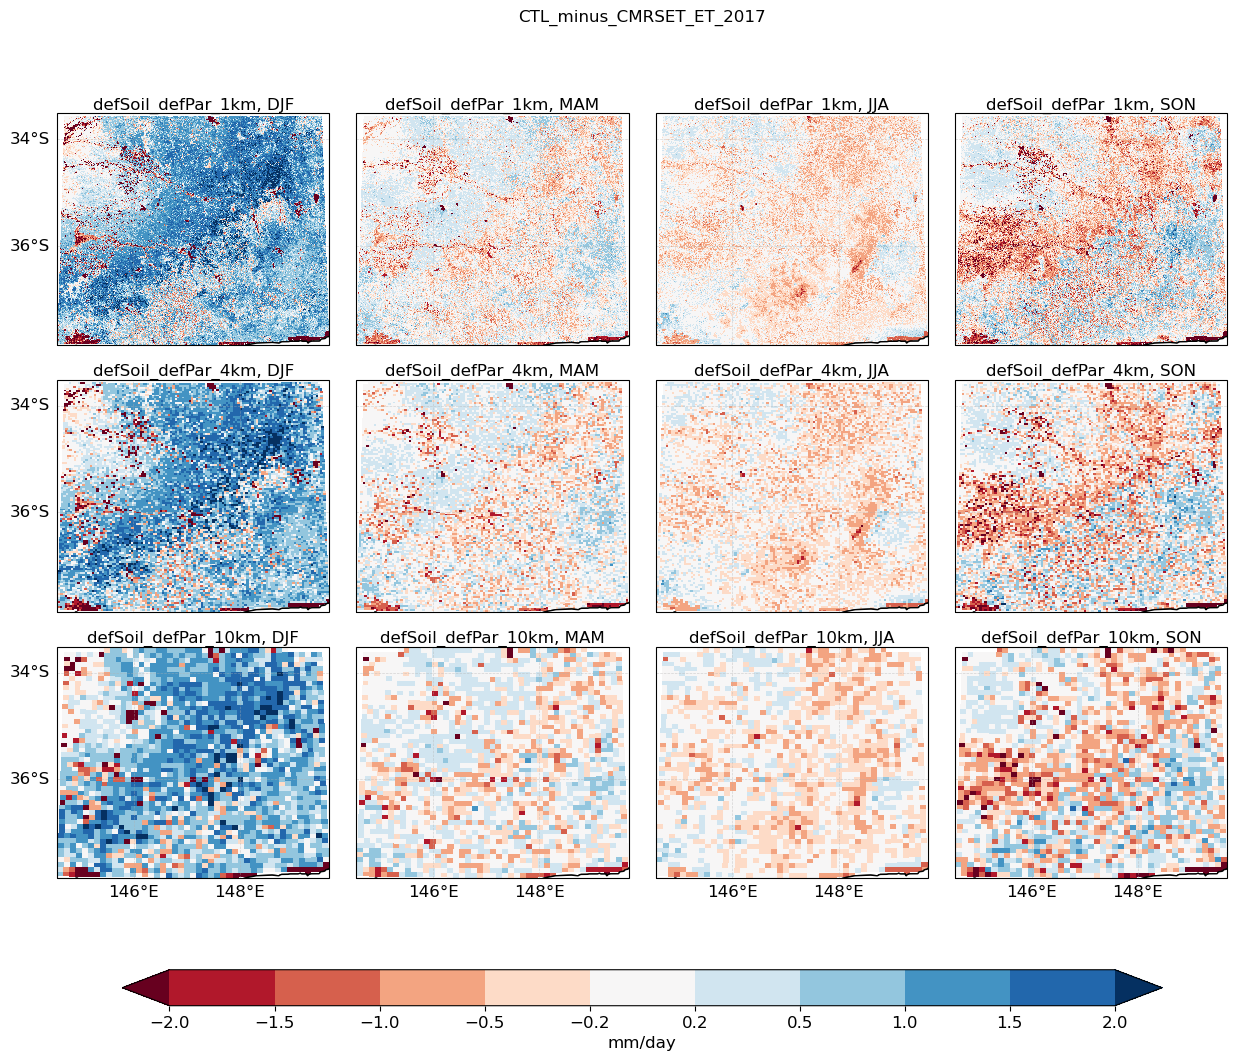

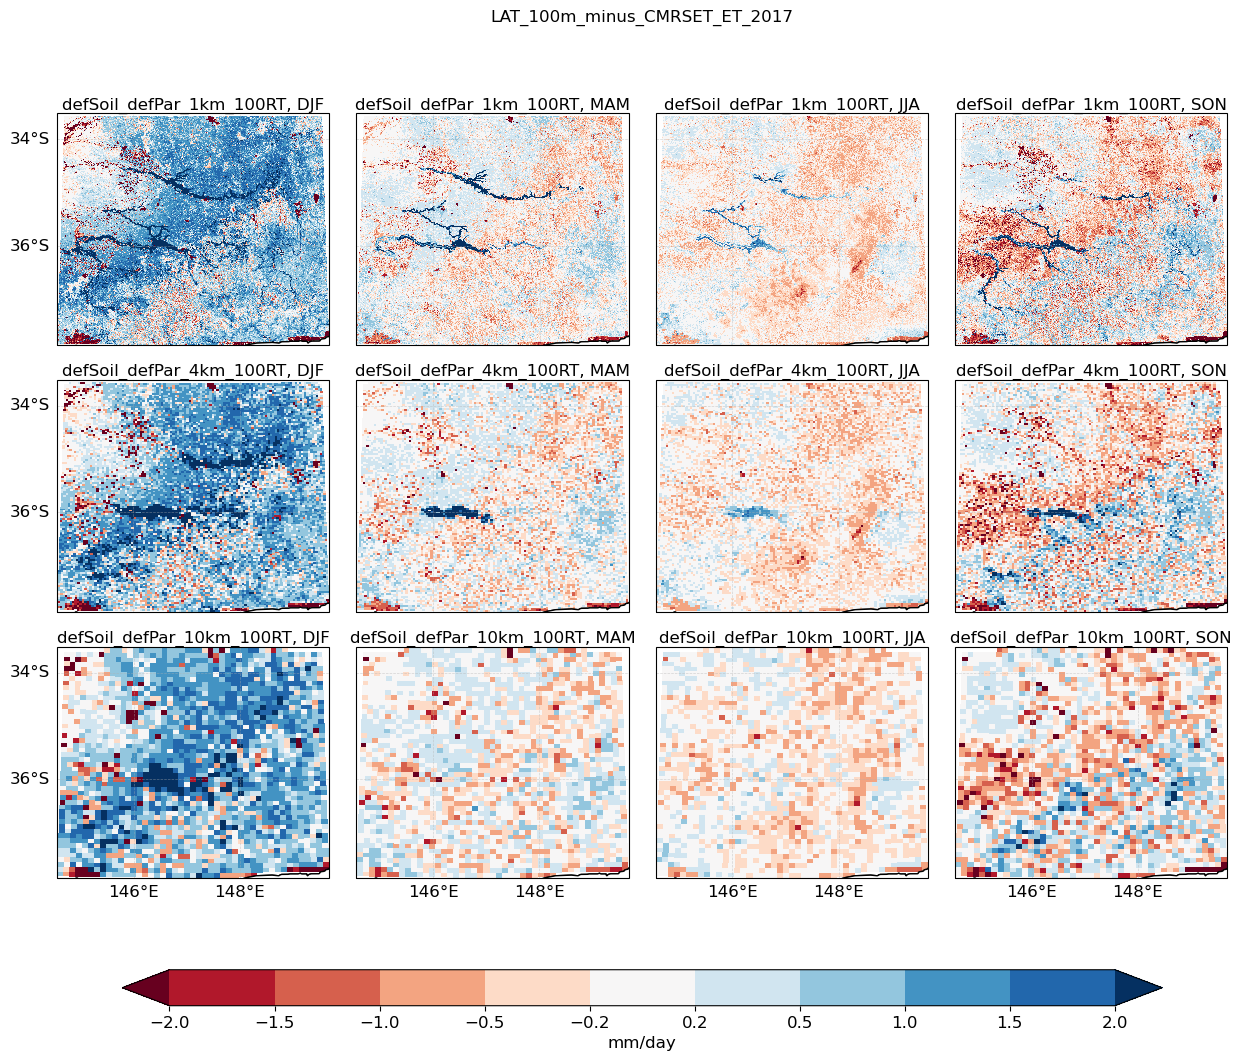

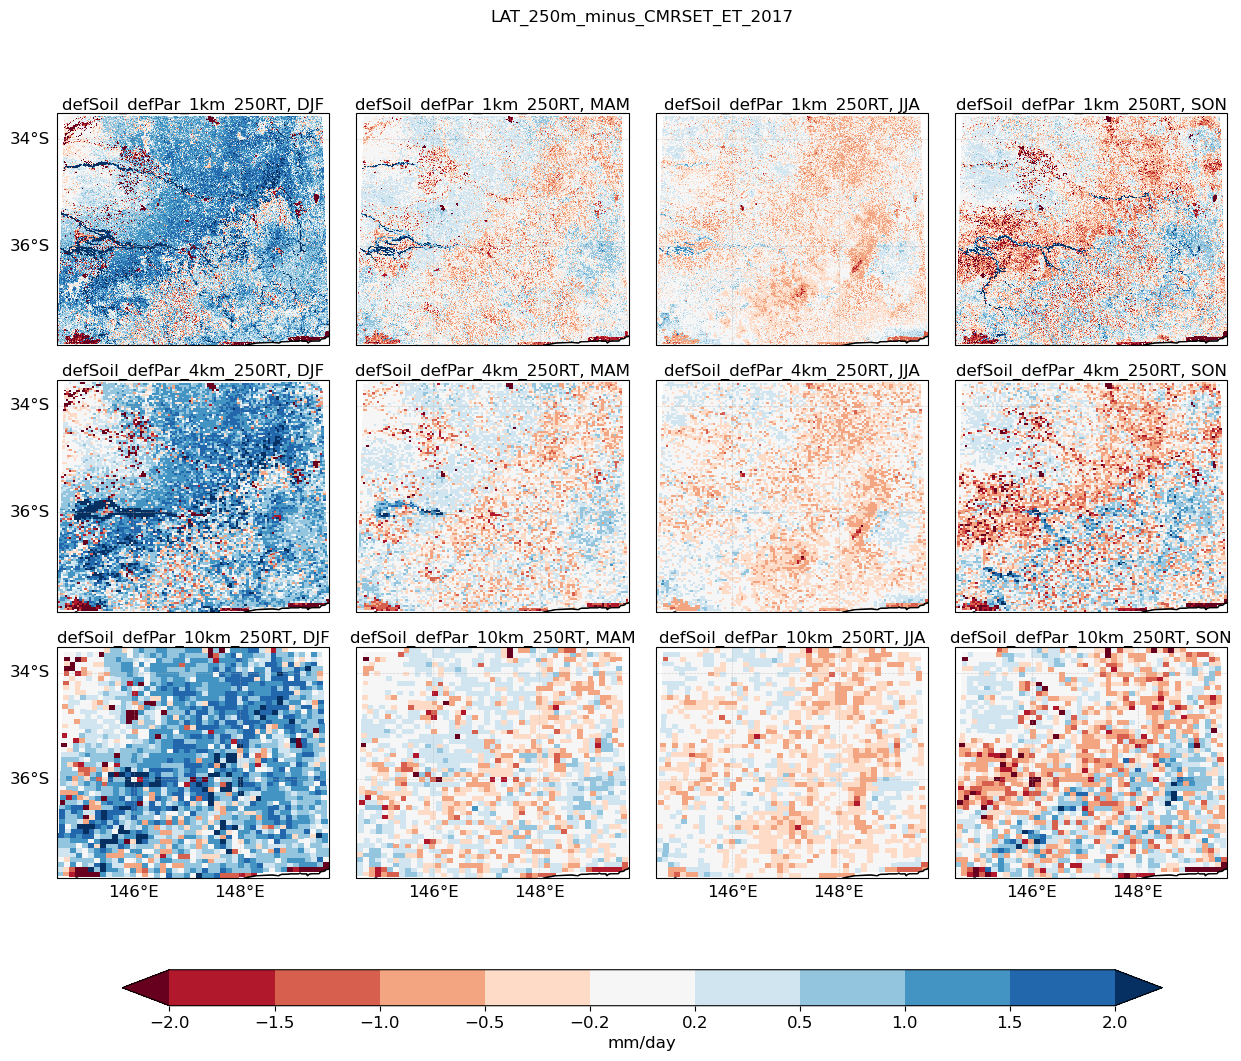

In [23]:
# plot observed seasonal mean 2016, 2017 & 2016-17

out_dir = '/home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_allRes_noBaseFlow/calib_eval/compare_MODIS_CMRSET_ET/'

########################
# SELECT SHAPEFILES
########################

sh1 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rbasin_polygon_SEA_subset.shp'
sh2 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rivers_so4_and_higher.shp'
sh3 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/SEA_domain4_4km.shp'

shapefile = [sh3]
shapefile_color=['black']
sh_lwd = [1]
sh_alpha = 0.3

########################
# PLOT
########################

%run -i /home/566/ad9701/wrf_hydro/spatial_plots_units_cbar_limits.py
# same color levels used for the model plots
mean_clevels = col_levels_mean['ET']
diff_clevels = col_levels_diff['ET'] #[-100, -75, -50, -30, -20, -10, 10, 20, 30, 50, 75, 100]
units = units['ET']

seas_names = ['DJF', 'MAM', 'JJA', 'SON']

# lat-lon limits around the SEA domain
# lat_sel = slice(-33.25, -38.25)
# lon_sel = slice(144.25, 149.9)
xticks = [144, 146, 148]
yticks = [-34, -36, -38]
panel_width = 3.25

time_key_list = [time_key] #['2016-17']

list_model_name_sets = [ctl_name_list, run_name_list, run_name_list_250]
set_names = ['CTL', 'LAT_100m', 'LAT_250m']

projection = ccrs.LambertConformal(central_latitude=-35.7, central_longitude=147.12, standard_parallels=(-35.7, -35.7), cutoff=0)

for time_key in time_key_list:
    for list_da_diff, list_model_name, label in zip(list_all_da_mdl_minus_cmrset_sets, list_model_name_sets, set_names):

        plot_list = [list_da_diff[0].sel(season = s) for s in seas_names]
        plot_list.extend([list_da_diff[1].sel(season = s) for s in seas_names])
        plot_list.extend([list_da_diff[2].sel(season = s) for s in seas_names])
       
        subplot_title = [x + ', ' + y for x in list_model_name for y in seas_names]
    
        cmap = 'RdBu'
        cbar_extend = 'both'
            
        panel_height = 4
        fig1 = myfuncs.draw_pcolormesh_Npanels(plot_list, ncols=4, nrows=3, #projection=projection, 
                                               subplot_title=subplot_title, main_title=label + '_minus_CMRSET_' + mdlVar + '_' + time_key, 
                                               xticks=xticks, yticks=yticks, #level=[]
                                               levels=diff_clevels, cmap=cmap, cbar_extend=cbar_extend, cbar_label=units,longer_cbar=True,
                                               panel_height=panel_height, panel_width=panel_width,
                                               out_dir=out_dir, out_figname=label + '_minus_CMRSET_' + mdlVar + '_' + time_key , fig_dpi=600) 
                                               #shapefile = shapefile, shapefile_color=shapefile_color, sh_alpha = sh_alpha, sh_lwd = sh_lwd)

### 1(b) model - domAvg of model

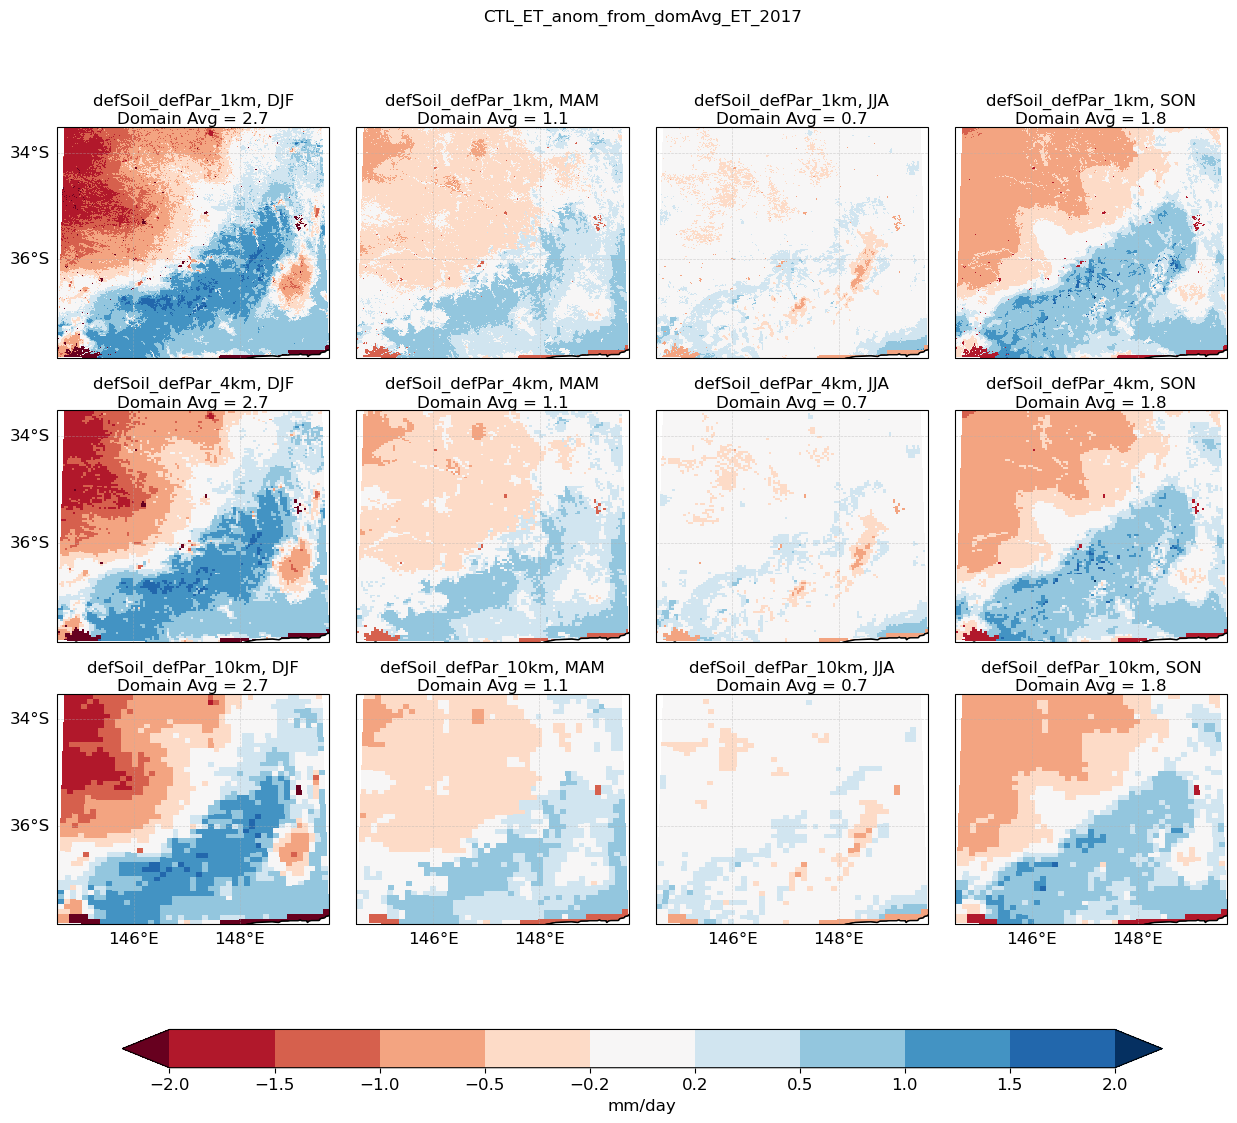

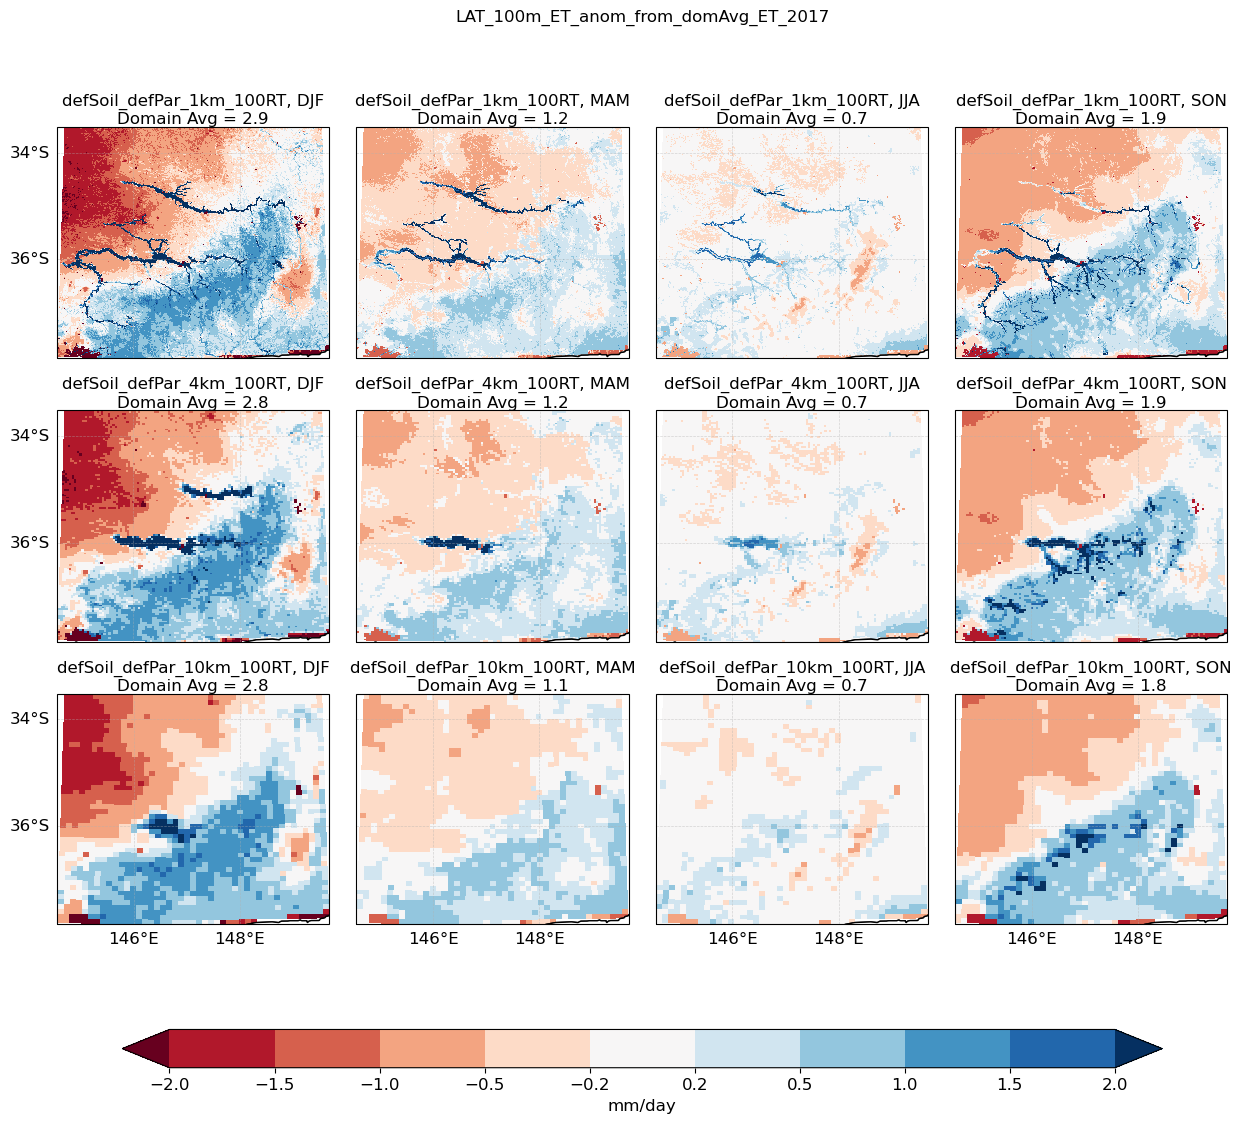

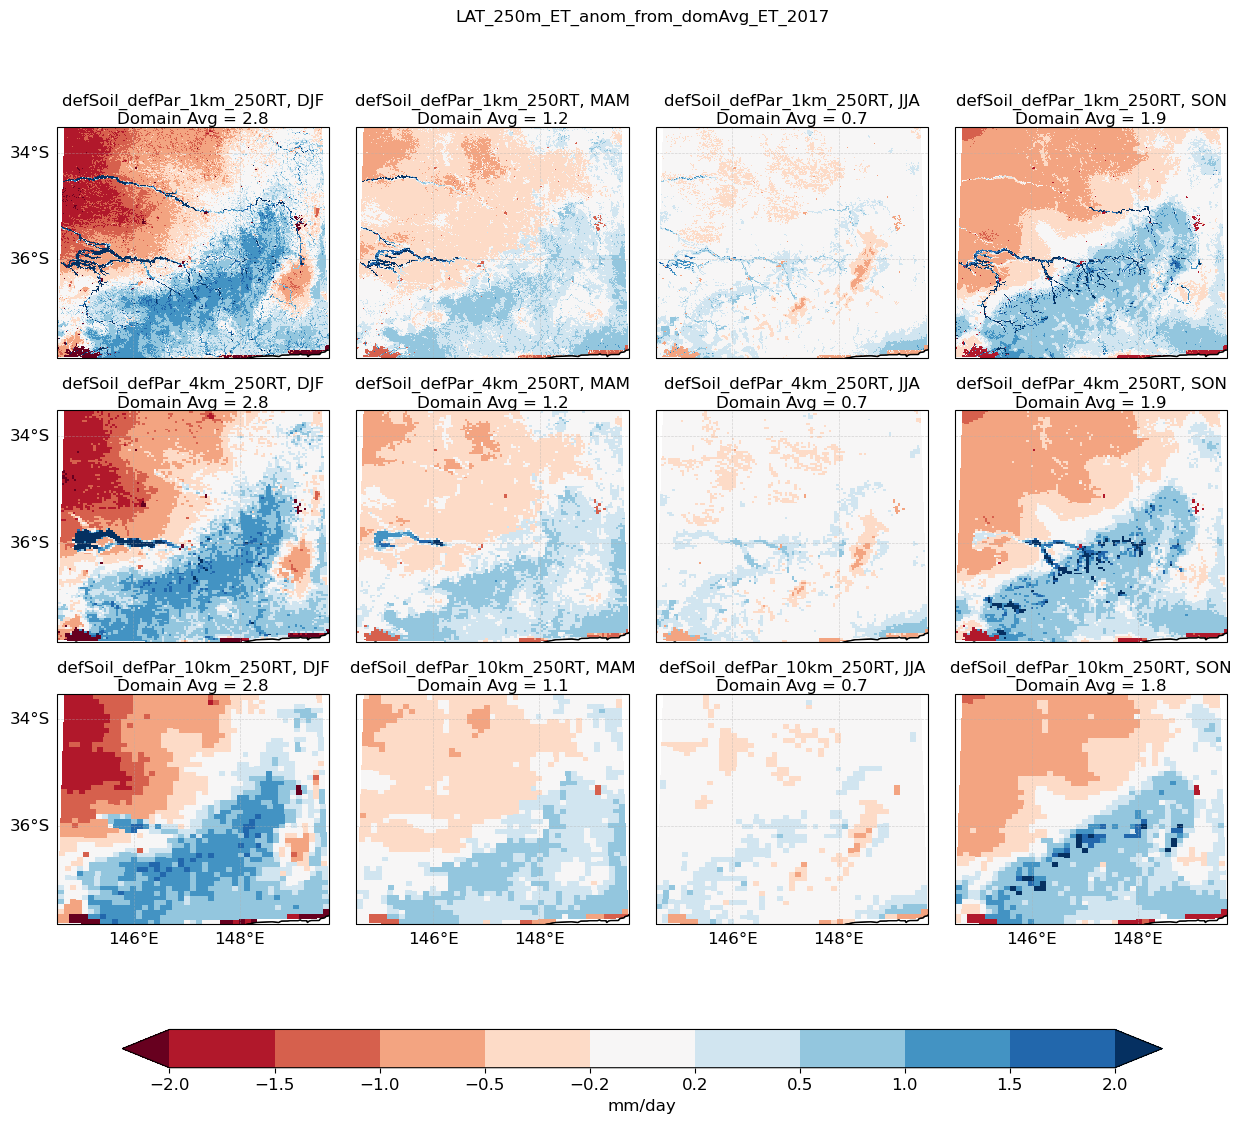

In [24]:
# plot observed seasonal mean 2016, 2017 & 2016-17

out_dir = '/home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_allRes_noBaseFlow/calib_eval/compare_MODIS_CMRSET_ET/'

########################
# SELECT SHAPEFILES
########################

sh1 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rbasin_polygon_SEA_subset.shp'
sh2 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rivers_so4_and_higher.shp'
sh3 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/SEA_domain4_4km.shp'

shapefile = [sh3]
shapefile_color=['black']
sh_lwd = [1]
sh_alpha = 0.3

########################
# PLOT
########################

%run -i /home/566/ad9701/wrf_hydro/spatial_plots_units_cbar_limits.py
# same color levels used for the model plots
mean_clevels = col_levels_mean['ET']
diff_clevels = col_levels_diff['ET'] #[-100, -75, -50, -30, -20, -10, 10, 20, 30, 50, 75, 100]
units = units['ET']

seas_names = ['DJF', 'MAM', 'JJA', 'SON']

# lat-lon limits around the SEA domain
# lat_sel = slice(-33.25, -38.25)
# lon_sel = slice(144.25, 149.9)
xticks = [144, 146, 148]
yticks = [-34, -36, -38]
panel_width = 3.25

time_key_list = [time_key] #['2016-17']

list_model_name_sets = [ctl_name_list, run_name_list, run_name_list_250]
set_names = ['CTL', 'LAT_100m', 'LAT_250m']

projection = ccrs.LambertConformal(central_latitude=-35.7, central_longitude=147.12, standard_parallels=(-35.7, -35.7), cutoff=0)

for time_key in time_key_list:
    for list_da_diff, list_model_name, label in zip(list_all_da_mdl_sets, list_model_name_sets, set_names):

        plot_list_temp = [(list_da_diff[0].sel(season = s)  - list_da_diff[0].sel(season = s).mean().values).assign_attrs(list_da_diff[0].attrs) for s in seas_names]
        plot_list_meanVal = [round(float(list_da_diff[0].sel(season = s).mean().values),1) for s in seas_names]
        
        plot_list_temp.extend([(list_da_diff[1].sel(season = s) - list_da_diff[1].sel(season = s).mean().values).assign_attrs(list_da_diff[1].attrs) for s in seas_names])
        plot_list_meanVal.extend([round(float(list_da_diff[1].sel(season = s).mean().values),1) for s in seas_names])
        
        plot_list_temp.extend([(list_da_diff[2].sel(season = s) - list_da_diff[2].sel(season = s).mean().values).assign_attrs(list_da_diff[2].attrs) for s in seas_names])
        plot_list_meanVal.extend([round(float(list_da_diff[2].sel(season = s).mean().values),1) for s in seas_names])

        plot_list = []
        for da in plot_list_temp:
            da_wCoord = myhydro.add_latlon_coords(da)
            plot_list.append(da_wCoord)
       
        subplot_title = [x + ', ' + y for x in list_model_name for y in seas_names]
        subplot_title = [x + '\nDomain Avg = ' + str(y) for (x,y) in zip(subplot_title,plot_list_meanVal)]
    
        cmap = 'RdBu'
        cbar_extend = 'both'
            
        panel_height = 4.25
        fig1 = myfuncs.draw_pcolormesh_Npanels(plot_list, ncols=4, nrows=3, #projection=projection, 
                                               subplot_title=subplot_title, main_title=label + '_ET_anom_from_domAvg_' + mdlVar + '_' + time_key, 
                                               xticks=xticks, yticks=yticks, #level=[]
                                               levels=diff_clevels, cmap=cmap, cbar_extend=cbar_extend, cbar_label=units,longer_cbar=True,
                                               panel_height=panel_height, panel_width=panel_width,
                                               out_dir=out_dir, out_figname=label + '_ET_anom_from_domAvg_' + mdlVar + '_' + time_key, fig_dpi=600) 
                                               #shapefile = shapefile, shapefile_color=shapefile_color, sh_alpha = sh_alpha, sh_lwd = sh_lwd)

### 1(c) CMRSET diff from domAvg

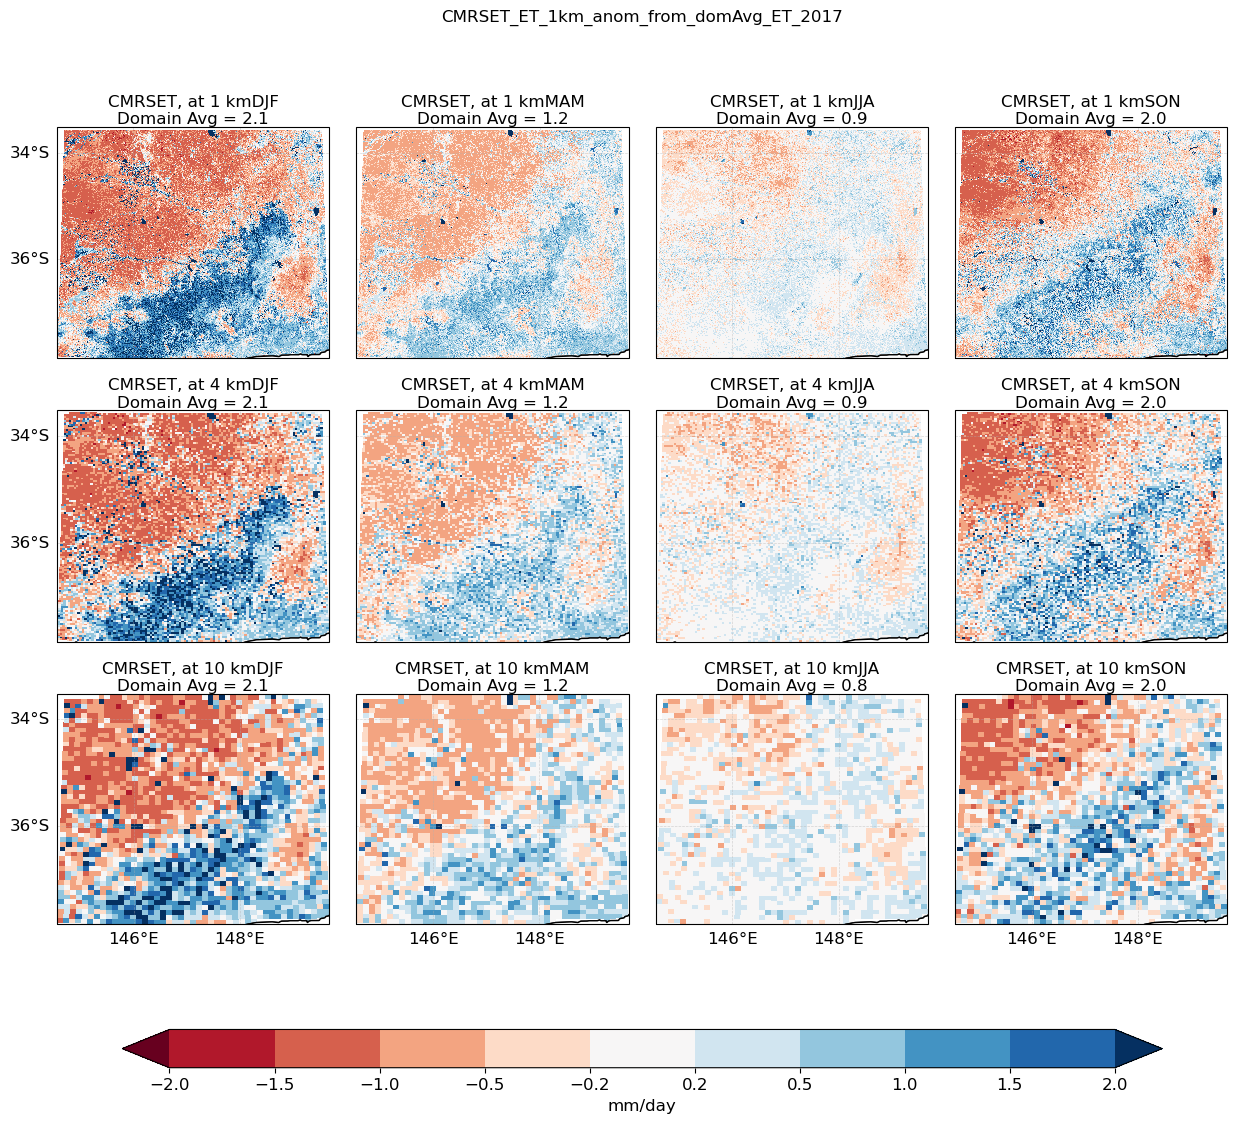

In [25]:
# plot observed seasonal mean 2016, 2017 & 2016-17

out_dir = '/home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_allRes_noBaseFlow/calib_eval/compare_MODIS_CMRSET_ET/'

########################
# SELECT SHAPEFILES
########################

sh1 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rbasin_polygon_SEA_subset.shp'
sh2 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rivers_so4_and_higher.shp'
sh3 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/SEA_domain4_4km.shp'

shapefile = [sh3]
shapefile_color=['black']
sh_lwd = [1]
sh_alpha = 0.3

########################
# PLOT
########################

%run -i /home/566/ad9701/wrf_hydro/spatial_plots_units_cbar_limits.py
# same color levels used for the model plots
mean_clevels = col_levels_mean['ET']
diff_clevels = col_levels_diff['ET'] #[-100, -75, -50, -30, -20, -10, 10, 20, 30, 50, 75, 100]
units = units['ET']

seas_names = ['DJF', 'MAM', 'JJA', 'SON']

# lat-lon limits around the SEA domain
# lat_sel = slice(-33.25, -38.25)
# lon_sel = slice(144.25, 149.9)
xticks = [144, 146, 148]
yticks = [-34, -36, -38]
panel_width = 3.25

time_key_list = [time_key] #['2016-17']

list_model_name_sets = [ctl_name_list, run_name_list, run_name_list_250]
set_names = ['CTL', 'LAT_100m', 'LAT_250m']

projection = ccrs.LambertConformal(central_latitude=-35.7, central_longitude=147.12, standard_parallels=(-35.7, -35.7), cutoff=0)

list_da_obs_reg = list_all_da_cmrset_reg_sets[0]

for time_key in time_key_list:
    #for list_da_diff, list_model_name, label in zip(list_all_da_mdl_sets, list_model_name_sets, set_names):

    plot_list_temp = [list_da_obs_reg[0].sel(season = s)  - list_da_obs_reg[0].sel(season = s).mean().values for s in seas_names]
    plot_list_meanVal = [round(float(list_da_obs_reg[0].sel(season = s).mean().values),1) for s in seas_names]
    
    plot_list_temp.extend([list_da_obs_reg[1].sel(season = s) - list_da_obs_reg[1].sel(season = s).mean().values for s in seas_names])
    plot_list_meanVal.extend([round(float(list_da_obs_reg[1].sel(season = s).mean().values),1) for s in seas_names])
    
    plot_list_temp.extend([list_da_obs_reg[2].sel(season = s) - list_da_obs_reg[2].sel(season = s).mean().values for s in seas_names])
    plot_list_meanVal.extend([round(float(list_da_obs_reg[2].sel(season = s).mean().values),1) for s in seas_names])

    plot_list = plot_list_temp
    # for da in plot_list_temp:
    #     da_wCoord = myhydro.add_latlon_coords(da)
    #     plot_list.append(da_wCoord)
   
    subplot_title = ['CMRSET, at ' + str(x) + ' km' + y for x in [1, 4, 10] for y in seas_names]
    subplot_title = [x + '\nDomain Avg = ' + str(y) for (x,y) in zip(subplot_title,plot_list_meanVal)]

    cmap = 'RdBu'
    cbar_extend = 'both'
        
    panel_height = 4.25
    fig1 = myfuncs.draw_pcolormesh_Npanels(plot_list, ncols=4, nrows=3, #projection=projection, 
                                           subplot_title=subplot_title, main_title='CMRSET_ET_1km_anom_from_domAvg_' + mdlVar + '_' + time_key, 
                                           xticks=xticks, yticks=yticks, #level=[]
                                           levels=diff_clevels, cmap=cmap, cbar_extend=cbar_extend, cbar_label=units,longer_cbar=True,
                                           panel_height=panel_height, panel_width=panel_width,
                                           out_dir=out_dir, out_figname='CMRSET_ET_1km_anom_from_domAvg_' + mdlVar + '_' + time_key, fig_dpi=600) 
                                           #shapefile = shapefile, shapefile_color=shapefile_color, sh_alpha = sh_alpha, sh_lwd = sh_lwd)

### At the original resolution of 30 m

In [5]:
%who

BIGGER_SIZE	 Line2D	 MEDIUM_SIZE	 Patch	 Proj	 SMALL_SIZE	 ccrs	 cfeature	 glob	 
gpd	 myfuncs	 myhydro	 new_path	 np	 os	 pd	 plt	 sns	 
sys	 xe	 xr	 


In [3]:
# mean seasonal CMRSET obs @ 30m resolution
obsVar = 'ETa'
time_key = '2016-17'
cmrset_dir = '/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/seasonal_data/'
ds_cmrset = xr.open_dataset(cmrset_dir + time_key + '_' + obsVar + '_mean.nc')
da_obs_cmrset = ds_cmrset[obsVar].load()

In [10]:
da_obs_cmrset

<xarray.DataArray 'ETa' (season: 4, lat: 19439, lon: 22371)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon          (lon) float64 144.1 144.1 144.1 144.1 ... 150.1 150.1 150.1
  * lat          (lat) float64 -33.24 -33.24 -33.24 ... -38.48 -38.48 -38.48
    spatial_ref  int64 0
  * season       (season) object 'DJF' 'JJA' 'MAM' 'SON'

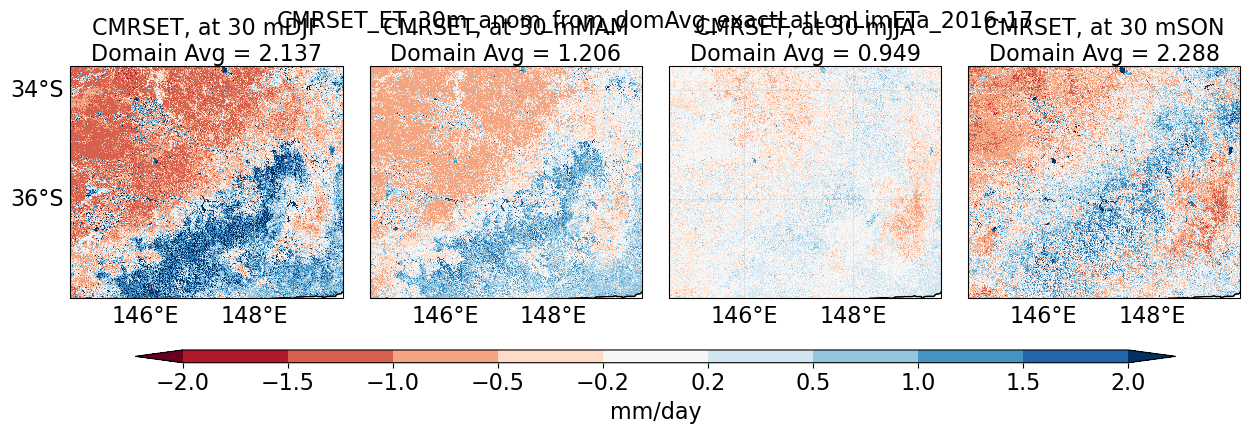

In [4]:
# plot observed seasonal mean 2016, 2017 & 2016-17

out_dir = '/home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_allRes_noBaseFlow/calib_eval/compare_MODIS_CMRSET_ET/'

########################
# SELECT SHAPEFILES
########################

sh1 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rbasin_polygon_SEA_subset.shp'
sh2 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rivers_so4_and_higher.shp'
sh3 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/SEA_domain4_4km.shp'

shapefile = [sh3]
shapefile_color=['black']
sh_lwd = [1]
sh_alpha = 0.3

########################
# PLOT
########################

%run -i /home/566/ad9701/wrf_hydro/spatial_plots_units_cbar_limits.py
# same color levels used for the model plots
mean_clevels = col_levels_mean['ET']
diff_clevels = col_levels_diff['ET'] #[-100, -75, -50, -30, -20, -10, 10, 20, 30, 50, 75, 100]
units = units['ET']

seas_names = ['DJF', 'MAM', 'JJA', 'SON']

# lat-lon limits around the SEA domain
# lat_sel = slice(-33.25, -38.25)
# lon_sel = slice(144.25, 149.9)

# exact lat-lon limits around the SEA domain
lat_sel = slice(-33.56, -37.81)
lon_sel = slice(144.62, 149.62)

xticks = [144, 146, 148]
yticks = [-34, -36, -38]
panel_width = 3.25

time_key_list = ['2016-17']

#list_model_name_sets = [ctl_name_list, run_name_list, run_name_list_250]
set_names = ['CTL', 'LAT_100m', 'LAT_250m']

projection = ccrs.LambertConformal(central_latitude=-35.7, central_longitude=147.12, standard_parallels=(-35.7, -35.7), cutoff=0)

#list_da_obs_reg = list_all_da_cmrset_reg_sets[0]

for time_key in time_key_list:
    #for list_da_diff, list_model_name, label in zip(list_all_da_mdl_sets, list_model_name_sets, set_names):

    plot_list = [(da_obs_cmrset.sel(season = s, lat = lat_sel, lon = lon_sel) - da_obs_cmrset.sel(season = s, lat = lat_sel, lon = lon_sel).mean().values)/1000 for s in seas_names]
    
    # plot_list_meanVal = [round(float(x.mean().values),1) for x in plot_list]
    plot_list_meanVal = [round(float(da_obs_cmrset.sel(season = s, lat = lat_sel, lon = lon_sel).mean().values))/1000 for s in seas_names]

    # plot_list_temp = [list_da_obs_reg[0].sel(season = s)  - list_da_obs_reg[0].sel(season = s).mean().values for s in seas_names]
    # plot_list_meanVal = [round(float(list_da_obs_reg[0].sel(season = s).mean().values),1) for s in seas_names]
    
    # plot_list_temp.extend([list_da_obs_reg[1].sel(season = s) - list_da_obs_reg[1].sel(season = s).mean().values for s in seas_names])
    # plot_list_meanVal.extend([round(float(list_da_obs_reg[1].sel(season = s).mean().values),1) for s in seas_names])
    
    # plot_list_temp.extend([list_da_obs_reg[2].sel(season = s) - list_da_obs_reg[2].sel(season = s).mean().values for s in seas_names])
    # plot_list_meanVal.extend([round(float(list_da_obs_reg[2].sel(season = s).mean().values),1) for s in seas_names])
    # plot_list = plot_list_temp
    
    # for da in plot_list_temp:
    #     da_wCoord = myhydro.add_latlon_coords(da)
    #     plot_list.append(da_wCoord)
   
    subplot_title = ['CMRSET, at 30 m' + y for y in seas_names]
    subplot_title = [x + '\nDomain Avg = ' + str(y) for (x,y) in zip(subplot_title,plot_list_meanVal)]

    cmap = 'RdBu'
    cbar_extend = 'both'
        
    panel_height = 4.25
    fig1 = myfuncs.draw_pcolormesh_Npanels(plot_list, ncols=4, nrows=1, #projection=projection, 
                                           subplot_title=subplot_title, main_title='CMRSET_ET_30m_anom_from_domAvg_exactLatLonLim' + obsVar + '_' + time_key, 
                                           xticks=xticks, yticks=yticks, #level=[]
                                           levels=diff_clevels, cmap=cmap, cbar_extend=cbar_extend, cbar_label=units,longer_cbar=True,
                                           panel_height=panel_height, panel_width=panel_width,
                                           out_dir=out_dir, out_figname='CMRSET_ET_30m_anom_from_domAvg_exactLatLonLim' + obsVar + '_' + time_key, fig_dpi=600) 
                                           #shapefile = shapefile, shapefile_color=shapefile_color, sh_alpha = sh_alpha, sh_lwd = sh_lwd)

In [8]:
# above plot was completed, but the domain avg numbers were not printed correctly
seas_names = ['DJF', 'MAM', 'JJA', 'SON']
lat_sel = slice(-33.25, -38.25)
lon_sel = slice(144.25, 149.9)
cmrset_domAvg = [da_obs_cmrset.sel(season = s, lat = lat_sel, lon = lon_sel).mean().values/1000 for s in seas_names]

In [9]:
cmrset_domAvg

[2.147212158203125, 1.2076876220703125, 0.9482379150390625, 2.272030029296875]

#### CMRSET domAvg numbers (in mm/day)
Note that the data in a small portion of the upper part of the domain is missing as I haven't downloaded those tiles.

##### season:         ['DJF', 'MAM', 'JJA', 'SON']
##### domAvg(mm/day): [2.15,   1.21,  0.95,  2.27]

## 2. MODIS ET Plots

#### 2(a). model - obs at different resolutions

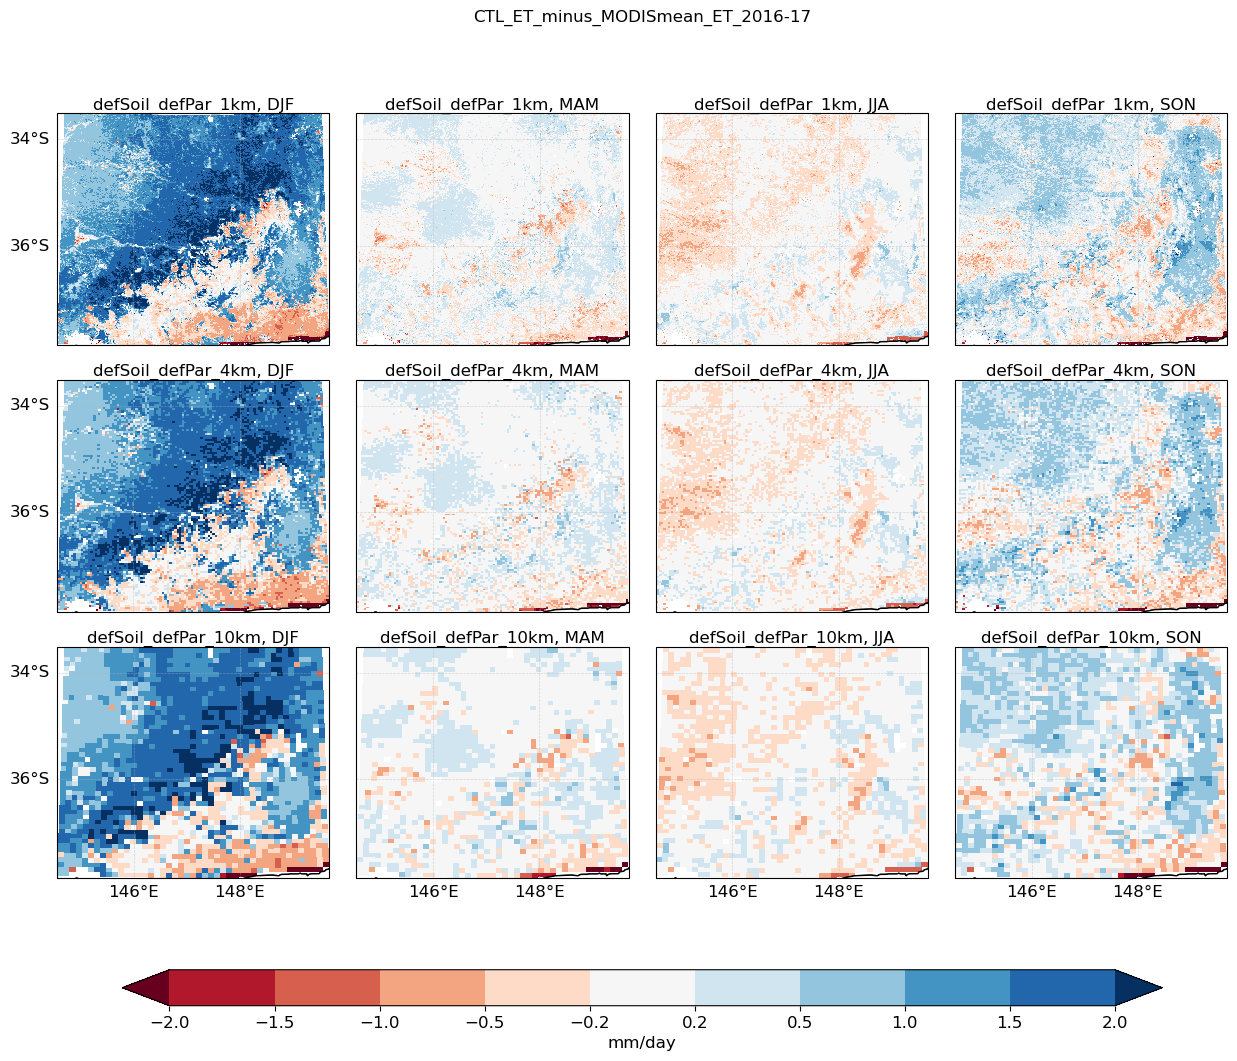

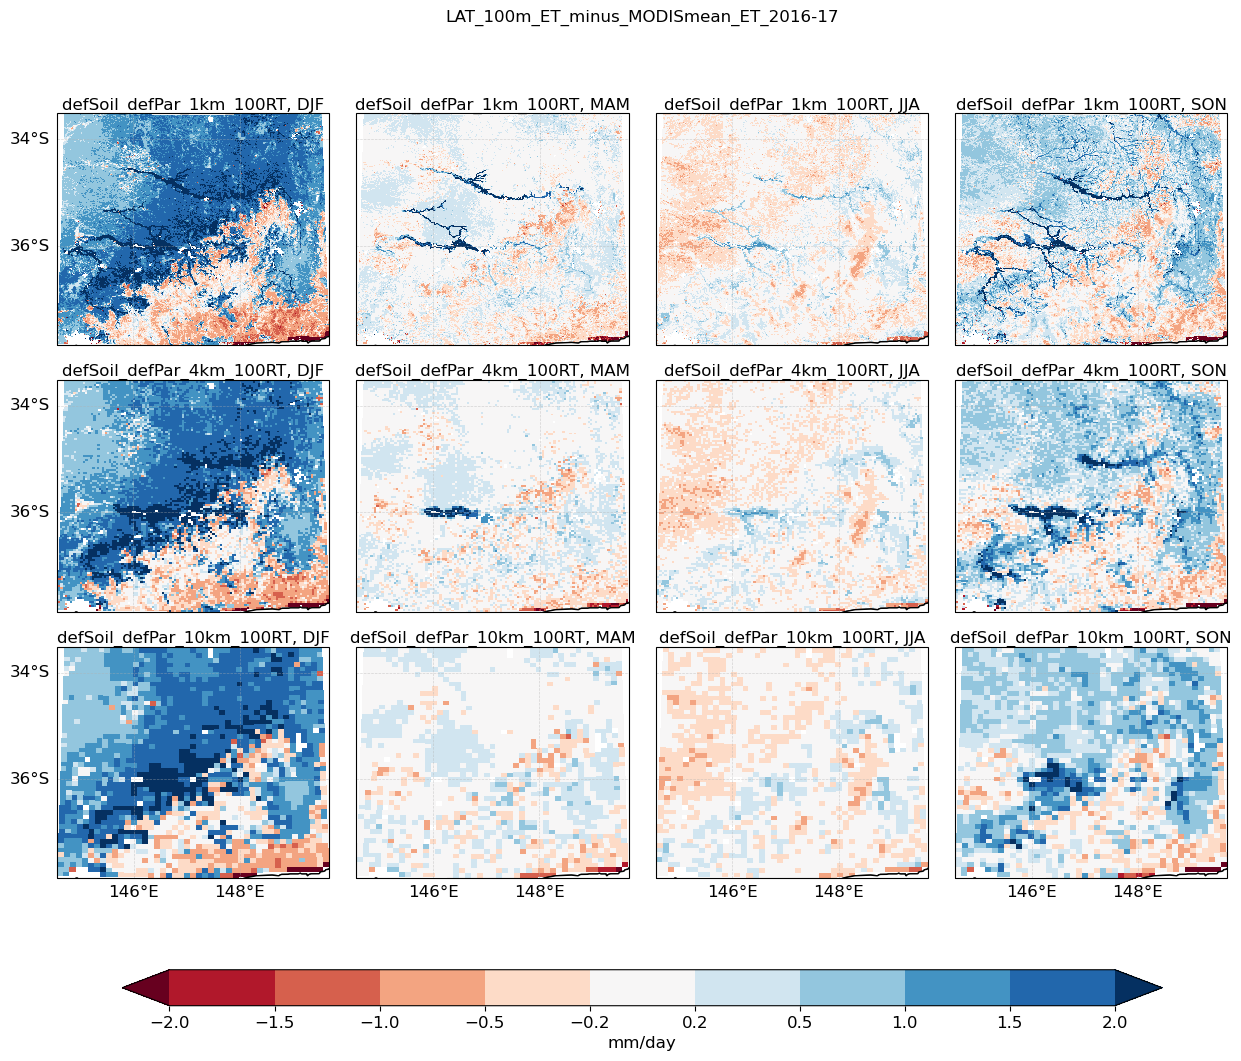

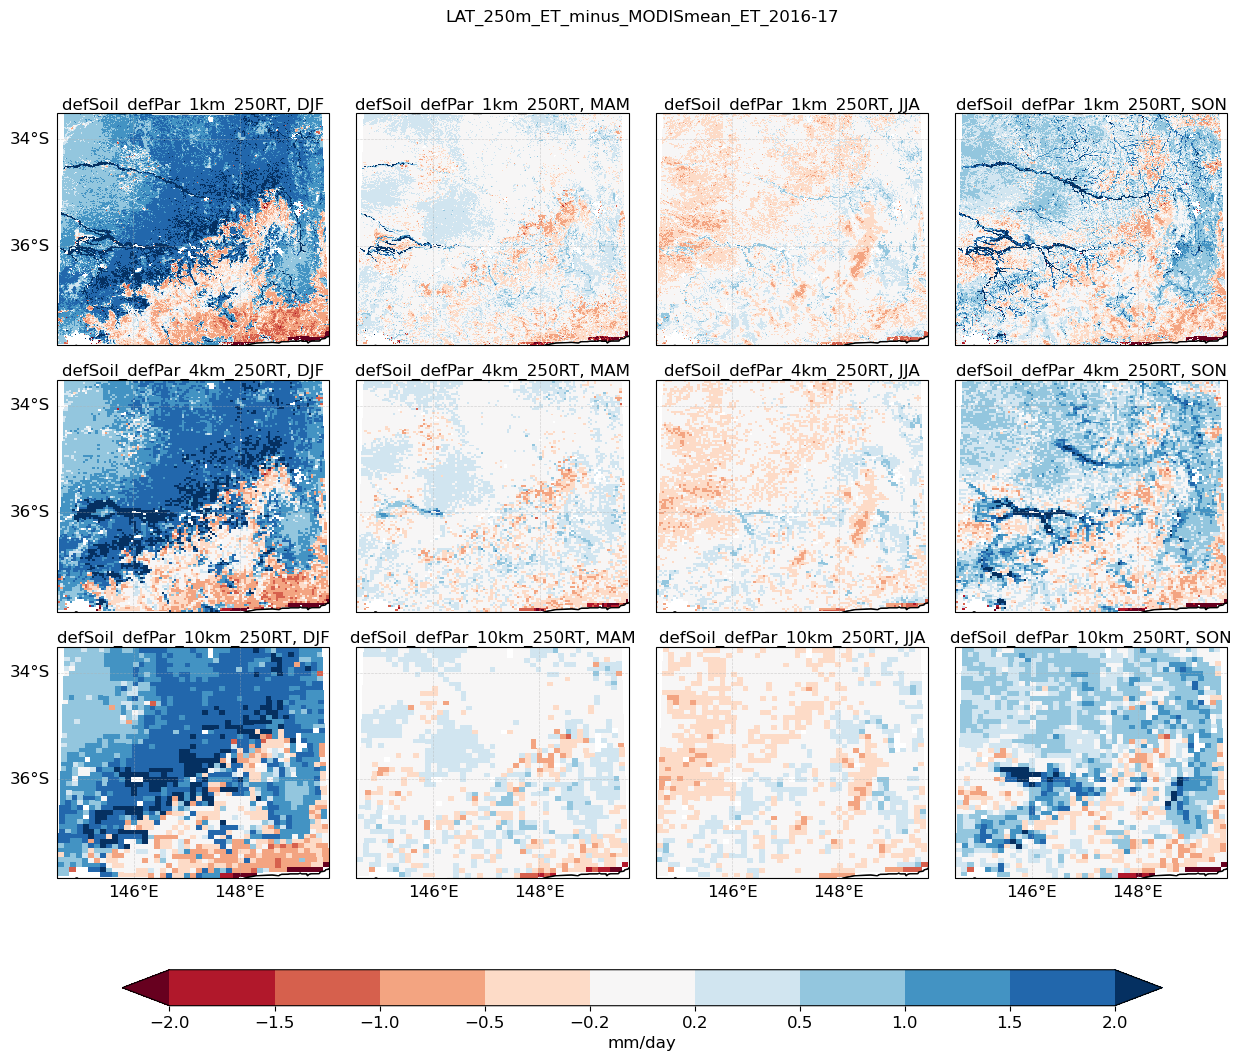

In [11]:
# plot observed seasonal mean 2016, 2017 & 2016-17

out_dir = '/home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_allRes_noBaseFlow/calib_eval/compare_MODIS_CMRSET_ET/'

########################
# SELECT SHAPEFILES
########################

sh1 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rbasin_polygon_SEA_subset.shp'
sh2 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rivers_so4_and_higher.shp'
sh3 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/SEA_domain4_4km.shp'

shapefile = [sh3]
shapefile_color=['black']
sh_lwd = [1]
sh_alpha = 0.3

########################
# PLOT
########################

%run -i /home/566/ad9701/wrf_hydro/spatial_plots_units_cbar_limits.py
# same color levels used for the model plots
mean_clevels = col_levels_mean['ET']
diff_clevels = col_levels_diff['ET'] #[-100, -75, -50, -30, -20, -10, 10, 20, 30, 50, 75, 100]
units = units['ET']

seas_names = ['DJF', 'MAM', 'JJA', 'SON']

# lat-lon limits around the SEA domain
# lat_sel = slice(-33.25, -38.25)
# lon_sel = slice(144.25, 149.9)
xticks = [144, 146, 148]
yticks = [-34, -36, -38]
panel_width = 3.25

time_key_list = ['2016-17']

list_model_name_sets = [ctl_name_list, run_name_list, run_name_list_250]
set_names = ['CTL', 'LAT_100m', 'LAT_250m']

projection = ccrs.LambertConformal(central_latitude=-35.7, central_longitude=147.12, standard_parallels=(-35.7, -35.7), cutoff=0)

for time_key in time_key_list:
    for list_da_diff, list_model_name, label in zip(list_all_da_mdl_minus_modis_sets, list_model_name_sets, set_names):

        plot_list = [list_da_diff[0].sel(season = s) for s in seas_names]
        plot_list.extend([list_da_diff[1].sel(season = s) for s in seas_names])
        plot_list.extend([list_da_diff[2].sel(season = s) for s in seas_names])
       
        subplot_title = [x + ', ' + y for x in list_model_name for y in seas_names]
    
        cmap = 'RdBu'
        cbar_extend = 'both'
            
        panel_height = 4
        fig1 = myfuncs.draw_pcolormesh_Npanels(plot_list, ncols=4, nrows=3, #projection=projection, 
                                               subplot_title=subplot_title, main_title=label + '_ET_minus_MODISmean_' + mdlVar + '_' + time_key, 
                                               xticks=xticks, yticks=yticks, #level=[]
                                               levels=diff_clevels, cmap=cmap, cbar_extend=cbar_extend, cbar_label=units,longer_cbar=True,
                                               panel_height=panel_height, panel_width=panel_width,
                                               out_dir=out_dir, out_figname=label + '_ET_minus_MODISmean_' + mdlVar + '_' + time_key, fig_dpi=600)
                                               #shapefile = shapefile, shapefile_color=shapefile_color, sh_alpha = sh_alpha, sh_lwd = sh_lwd)

### 1(c) obs - domAvg of obs; MODIS data
2(b) is the same as 1(b)

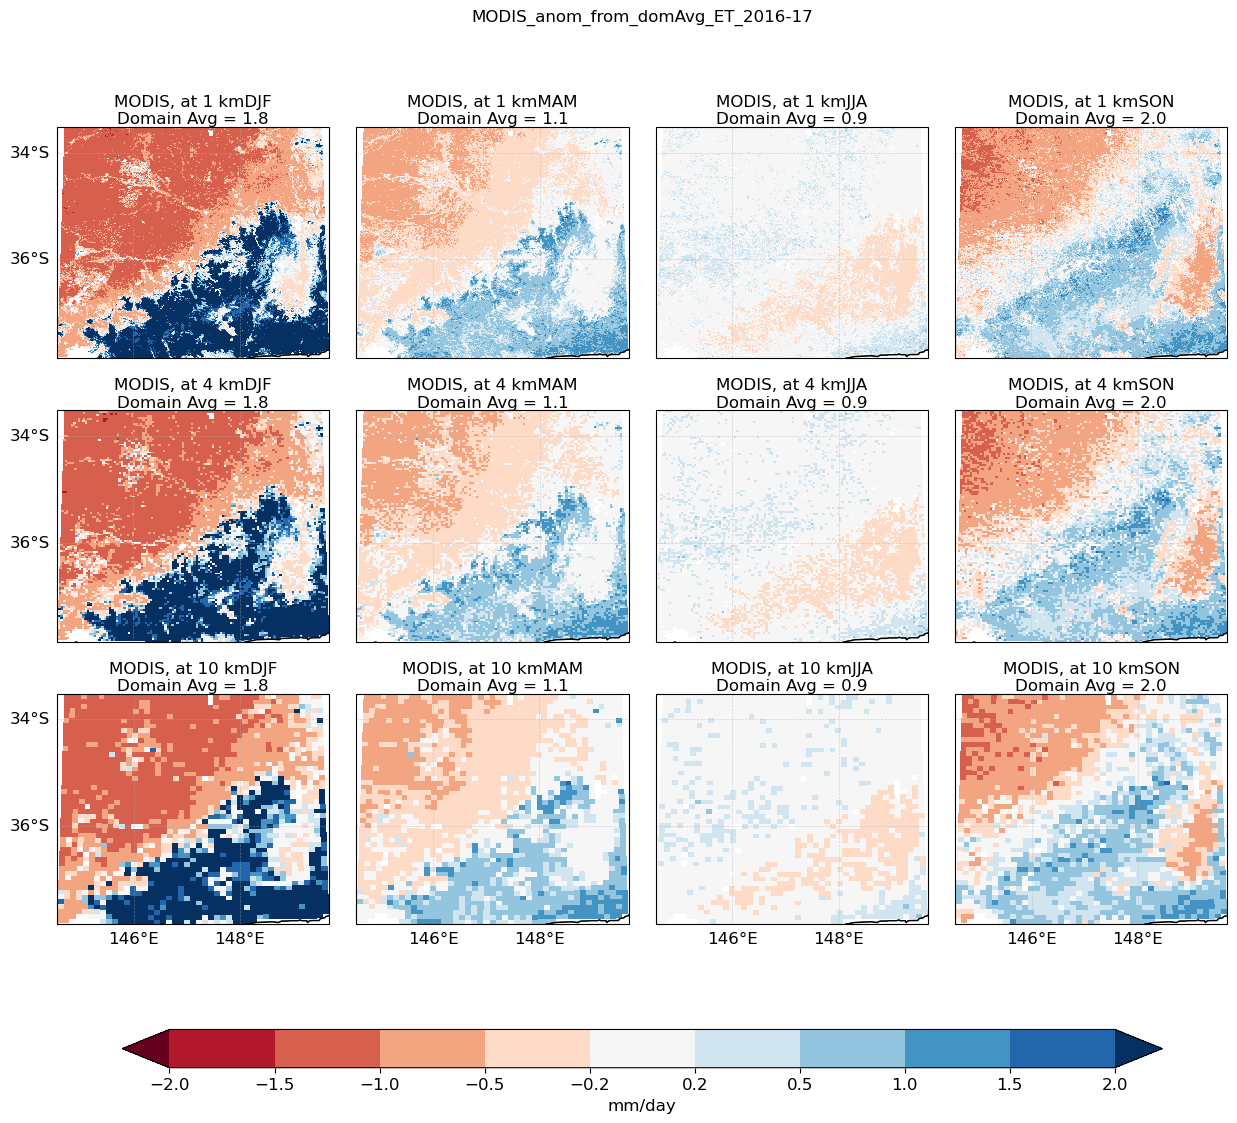

In [13]:
# plot observed seasonal mean 2016, 2017 & 2016-17

out_dir = '/home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_allRes_noBaseFlow/calib_eval/compare_MODIS_LE/'

########################
# SELECT SHAPEFILES
########################

sh1 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rbasin_polygon_SEA_subset.shp'
sh2 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rivers_so4_and_higher.shp'
sh3 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/SEA_domain4_4km.shp'

shapefile = [sh3]
shapefile_color=['black']
sh_lwd = [1]
sh_alpha = 0.3

########################
# PLOT
########################

%run -i /home/566/ad9701/wrf_hydro/spatial_plots_units_cbar_limits.py
# same color levels used for the model plots
mean_clevels = col_levels_mean['ET']
diff_clevels = col_levels_diff['ET'] #[-100, -75, -50, -30, -20, -10, 10, 20, 30, 50, 75, 100]
units = units['ET']

seas_names = ['DJF', 'MAM', 'JJA', 'SON']

# lat-lon limits around the SEA domain
# lat_sel = slice(-33.25, -38.25)
# lon_sel = slice(144.25, 149.9)
xticks = [144, 146, 148]
yticks = [-34, -36, -38]
panel_width = 3.25

time_key_list = ['2016-17']

list_model_name_sets = [ctl_name_list, run_name_list, run_name_list_250]
set_names = ['CTL', 'LAT_100m', 'LAT_250m']

projection = ccrs.LambertConformal(central_latitude=-35.7, central_longitude=147.12, standard_parallels=(-35.7, -35.7), cutoff=0)

list_da_obs_reg = list_all_da_modis_reg_sets[0]

for time_key in time_key_list:
    #for list_da_diff, list_model_name, label in zip(list_all_da_mdl_sets, list_model_name_sets, set_names):

    plot_list_temp = [list_da_obs_reg[0].sel(season = s)  - list_da_obs_reg[0].sel(season = s).mean().values for s in seas_names]
    plot_list_meanVal = [round(float(list_da_obs_reg[0].sel(season = s).mean().values),1) for s in seas_names]
    
    plot_list_temp.extend([list_da_obs_reg[1].sel(season = s) - list_da_obs_reg[1].sel(season = s).mean().values for s in seas_names])
    plot_list_meanVal.extend([round(float(list_da_obs_reg[1].sel(season = s).mean().values),1) for s in seas_names])
    
    plot_list_temp.extend([list_da_obs_reg[2].sel(season = s) - list_da_obs_reg[2].sel(season = s).mean().values for s in seas_names])
    plot_list_meanVal.extend([round(float(list_da_obs_reg[2].sel(season = s).mean().values),1) for s in seas_names])

    plot_list = plot_list_temp
    # for da in plot_list_temp:
    #     da_wCoord = myhydro.add_latlon_coords(da)
    #     plot_list.append(da_wCoord)
   
    subplot_title = ['MODIS, at ' + str(x) + ' km' + y for x in [1, 4, 10] for y in seas_names]
    subplot_title = [x + '\nDomain Avg = ' + str(y) for (x,y) in zip(subplot_title,plot_list_meanVal)]

    cmap = 'RdBu'
    cbar_extend = 'both'
        
    panel_height = 4.25
    fig1 = myfuncs.draw_pcolormesh_Npanels(plot_list, ncols=4, nrows=3, #projection=projection, 
                                           subplot_title=subplot_title, main_title='MODIS_anom_from_domAvg_' + mdlVar + '_' + time_key, 
                                           xticks=xticks, yticks=yticks, #level=[]
                                           levels=diff_clevels, cmap=cmap, cbar_extend=cbar_extend, cbar_label=units,longer_cbar=True,
                                           panel_height=panel_height, panel_width=panel_width,
                                           out_dir=out_dir, out_figname='MODIS_anom_from_domAvg_' + mdlVar + '_' + time_key, fig_dpi=600) 
                                           #shapefile = shapefile, shapefile_color=shapefile_color, sh_alpha = sh_alpha, sh_lwd = sh_lwd)

### Same plot at the original resolution of 500 m

In [6]:
# mean seasonal MODIS obs
obsVar = 'ET_500m'
terra_dir = '/g/data/w97/ad9701/WRF-Hydro/SEA/MODIS_ET_LE_geog/SEA_Terra_NetET_LE_GapFilled/seasonal_data/'
aqua_dir = '/g/data/w97/ad9701/WRF-Hydro/SEA/MODIS_ET_LE_geog/SEA_Aqua_NetET_LE_GapFilled/seasonal_data/'
ds_terra = xr.open_dataset(terra_dir + time_key + '_' + obsVar + '_mean.nc')
ds_aqua = xr.open_dataset(aqua_dir + time_key + '_' + obsVar + '_mean.nc')
da_obs_modis = (ds_terra[obsVar] + ds_aqua[obsVar])/2

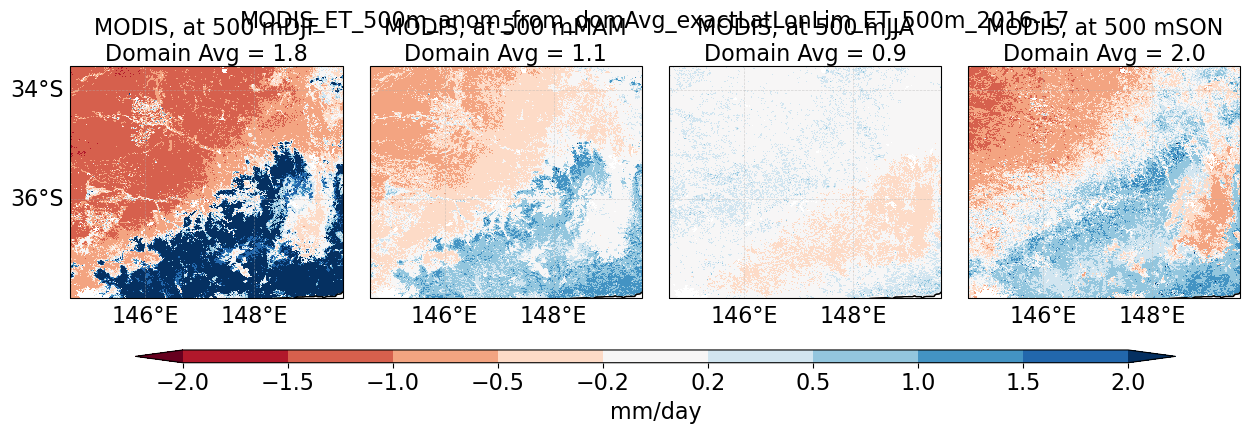

In [7]:
# plot observed seasonal mean 2016, 2017 & 2016-17

out_dir = '/home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_allRes_noBaseFlow/calib_eval/compare_MODIS_CMRSET_ET/'

########################
# SELECT SHAPEFILES
########################

sh1 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rbasin_polygon_SEA_subset.shp'
sh2 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/rivers_so4_and_higher.shp'
sh3 = '/g/data/w97/ad9701/WRF-Hydro/SEA/shapefiles/SEA_domain4_4km.shp'

shapefile = [sh3]
shapefile_color=['black']
sh_lwd = [1]
sh_alpha = 0.3

########################
# PLOT
########################

%run -i /home/566/ad9701/wrf_hydro/spatial_plots_units_cbar_limits.py
# same color levels used for the model plots
mean_clevels = col_levels_mean['ET']
diff_clevels = col_levels_diff['ET'] #[-100, -75, -50, -30, -20, -10, 10, 20, 30, 50, 75, 100]
units = units['ET']

seas_names = ['DJF', 'MAM', 'JJA', 'SON']

# lat-lon limits around the SEA domain
# lat_sel = slice(-33.25, -38.25)
# lon_sel = slice(144.25, 149.9)

xticks = [144, 146, 148]
yticks = [-34, -36, -38]
panel_width = 3.25

# exact lat-lon limits around the SEA domain
lat_sel = slice(-33.56, -37.81)
lon_sel = slice(144.62, 149.62)

time_key_list = ['2016-17']

#list_model_name_sets = [ctl_name_list, run_name_list, run_name_list_250]
set_names = ['CTL', 'LAT_100m', 'LAT_250m']

projection = ccrs.LambertConformal(central_latitude=-35.7, central_longitude=147.12, standard_parallels=(-35.7, -35.7), cutoff=0)

#list_da_obs_reg = list_all_da_cmrset_reg_sets[0]

for time_key in time_key_list:
    #for list_da_diff, list_model_name, label in zip(list_all_da_mdl_sets, list_model_name_sets, set_names):

    plot_list = [da_obs_modis.sel(season = s, lat = lat_sel, lon = lon_sel) - da_obs_modis.sel(season = s, lat = lat_sel, lon = lon_sel).mean().values for s in seas_names]
    plot_list_meanVal = [round(float(da_obs_modis.sel(season = s, lat = lat_sel, lon = lon_sel).mean().values),1) for s in seas_names]
   
    subplot_title = ['MODIS, at 500 m' + y for y in seas_names]
    subplot_title = [x + '\nDomain Avg = ' + str(y) for (x,y) in zip(subplot_title,plot_list_meanVal)]

    cmap = 'RdBu'
    cbar_extend = 'both'
        
    panel_height = 4.25
    fig1 = myfuncs.draw_pcolormesh_Npanels(plot_list, ncols=4, nrows=1, #projection=projection, 
                                           subplot_title=subplot_title, main_title='MODIS_ET_500m_anom_from_domAvg_exactLatLonLim_' + obsVar + '_' + time_key, 
                                           xticks=xticks, yticks=yticks, #level=[]
                                           levels=diff_clevels, cmap=cmap, cbar_extend=cbar_extend, cbar_label=units,longer_cbar=True,
                                           panel_height=panel_height, panel_width=panel_width,
                                           out_dir=out_dir, out_figname='MODIS_ET_500m_anom_from_domAvg_exactLatLonLim_' + obsVar + '_' + time_key, fig_dpi=600) 
                                           #shapefile = shapefile, shapefile_color=shapefile_color, sh_alpha = sh_alpha, sh_lwd = sh_lwd)